In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt
from src.DataLoaders import T01DataLoader, T08DataLoader
%config InlineBackend.figure_format = 'retina'

In [2]:
# Some Variables
years = range(2012,2023)
db_t01 = T01DataLoader()
db_t08 = T08DataLoader()

In [3]:
R_BU_T01_F = 'Datasets/PKS/2022/BU-T01-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
df.head()

,Schlüssel,Straftat,Anzahl erfasste Fälle,%-Anteil an allen Fällen,erfasste Fälle davon: Anzahl Versuche,erfasste Fälle davon: Versuche in %,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortveteilung: 500.000 und mehr,Tatortverteilung: unbekannt,mit Schusswaffe: gedroht,mit Schusswaffe: geschossen,Aufklärung: Anzahl Fälle,Aufklärung: in % (AQ),Tatverdächtige: insgesamt,Tatverdächtige: männlich,Tatverdächtige: weiblich,Nichtdeutsche Tatverdächtige: Anzahl,Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %
0,------,Straftaten insgesamt,5628584.0,100.0,414197,7.4,1304904,1508727,1099424,1572975,142554,4092,4442,3226935,57.3,2093782,1565240,528542,783876,37.4
1,000000,Straftaten gegen das Leben,3077.0,0.1,1770,57.5,887,974,566,635,15,8,133,2732,88.8,3539,2950,589,1270,35.9
2,010000,Mord § 211 StGB,662.0,0.0,451,68.1,205,160,122,166,9,3,59,604,91.2,763,654,109,293,38.4
3,010079,Sonstiger Mord,625.0,0.0,425,68,192,155,114,155,9,3,55,570,91.2,711,604,107,269,37.8
4,011000,Mord im Zusammenhang mit Raubdelikten,29.0,0.0,23,79.3,11,4,6,8,0,0,4,26,89.7,46,44,2,23,50


In [4]:
R_BU_T01_T = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-Tatortverteilung-Prozent.xlsx'
df = pd.read_excel(R_BU_T01_T,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
                        'Unnamed: 4':'Tatortverteilung: 20.000 bis unter 100.000',
                        'Unnamed: 5':'Tatortverteilung: 100.000 bis unter 500.000',
                        'Unnamed: 6':'Tatortverteilung: 500.000 und mehr',
                        'Unnamed: 7':'Tatortverteilung: unbekannt'})
inhabitant_distribution = df.iloc[4,3:].rename('Einwohnerverteilung (01.01.2022) in %')
print(inhabitant_distribution)
df = df.drop(range(5)).reset_index(drop=True)
df.head()

Tatortverteilung: bis unter 20.000 Einwohner    40.576384
Tatortverteilung: 20.000 bis unter 100.000      27.494591
Tatortverteilung: 100.000 bis unter 500.000     15.072914
Tatortverteilung: 500.000 und mehr              16.856111
Tatortverteilung: unbekannt                             x
Name: Einwohnerverteilung (01.01.2022) in %, dtype: object


,Schlüssel,Straftat,Anzahl erfasste Fälle,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortverteilung: 500.000 und mehr,Tatortverteilung: unbekannt
0,------,Straftaten insgesamt,5628584,23.183522,26.804735,19.53287,27.946194,2.53268
1,000000,Straftaten gegen das Leben,3077,28.826779,31.654209,18.39454,20.636984,0.487488
2,010000,Mord § 211 StGB,662,30.966767,24.169184,18.429003,25.075529,1.359517
3,010079,Sonstiger Mord,625,30.72,24.8,18.24,24.8,1.44
4,011000,Mord im Zusammenhang mit Raubdelikten,29,37.931034,13.793103,20.689655,27.586207,0


In [5]:
R_BU_T01_F = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-vollendete-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
df.head()

,Schlüssel,Straftat,Anzahl vollendete Fälle,%-Anteil an allen Fällen,Tatortverteilung: bis unter 20.000 Einwohner,erfasste Fälle davon: Versuche in %,Unnamed: 6,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,mit Schusswaffe: gedroht,Tatortverteilung: unbekannt,Aufklärung: Anzahl Fälle,mit Schusswaffe: geschossen,Tatverdächtige: insgesamt,Aufklärung: in % (AQ),Unnamed: 15,Nichtdeutsche Tatverdächtige: Anzahl,Tatverdächtige: weiblich
0,------,Straftaten insgesamt,5214387.0,100.0,1213314,1405119,1023898,1460870,111186,3649,4061,3071519,58.9,2023426,1510733,512693,749181,37
1,000000,Straftaten gegen das Leben,1307.0,0.0,391,420,238,250,8,0,53,1082,82.8,1371,1013,358,324,23.6
2,010000,Mord § 211 StGB,211.0,0.0,66,43,39,59,4,0,29,200,94.8,256,215,41,94,36.7
3,010079,Sonstiger Mord,200.0,0.0,60,43,39,54,4,0,28,190,95,239,199,40,83,34.7
4,011000,Mord im Zusammenhang mit Raubdelikten,6.0,0.0,4,0,0,2,0,0,1,5,83.3,13,12,1,10,76.9


# Zeitliche Gliederung

In [6]:
Z_T01_F = 'Datasets/PKS/2022/Zeitliche-Gliederung/T01-Faelle.csv'
df = pd.read_csv(Z_T01_F,sep=';',encoding=' iso8859-1',skiprows=1,thousands=',',decimal='.')
total = df[df.Straftat == 'Straftaten insgesamt']
total#.plot(x='Jahr',y='erfasste Faelle')
#plt.show()

df_z_t01_f = df


,Monat,Straftaten insgesamt
0,Jan.,421337
1,Febr.,390520
2,März,456125
3,April,438373
4,Mai,492336
5,Juni,476460
6,Juli,470170
7,Aug.,467760
8,Sept.,451006
9,Okt.,467533


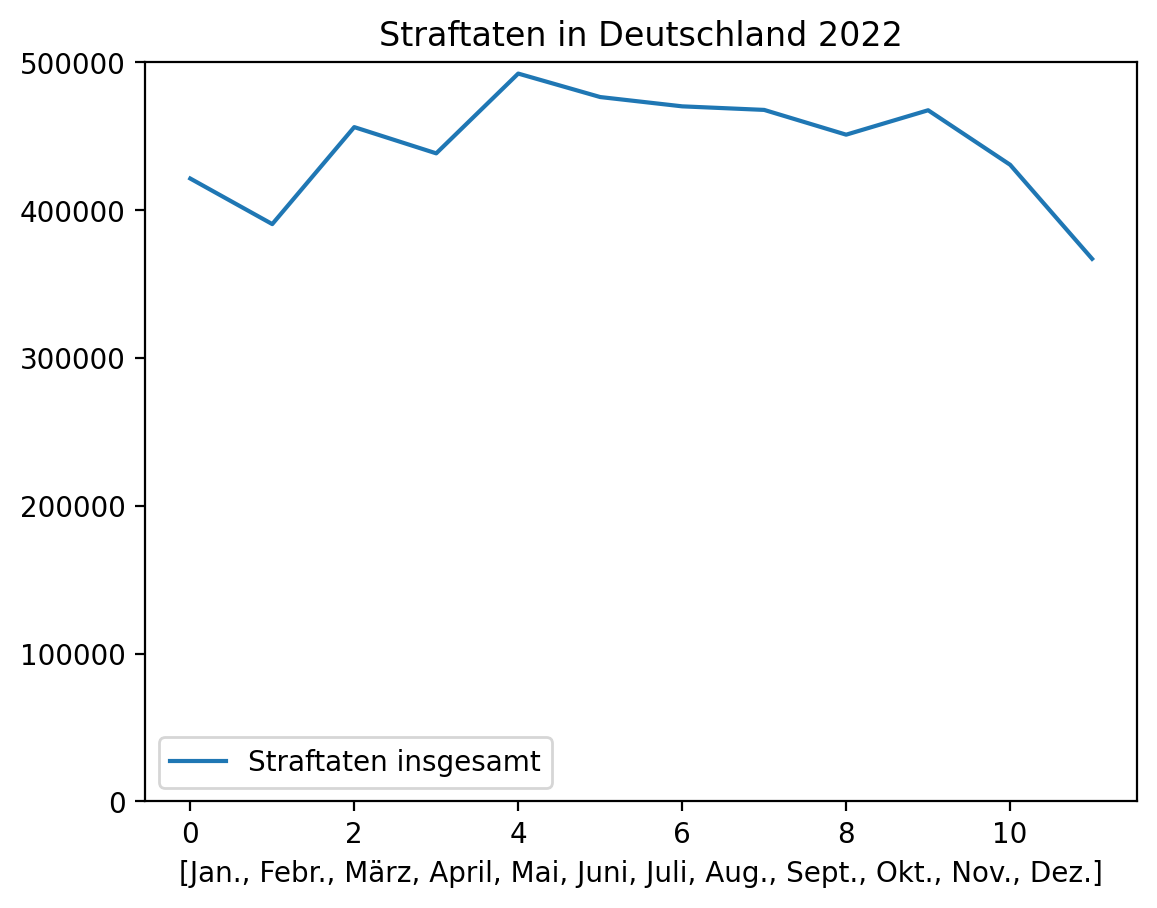

In [7]:
R_BU_T08_T = 'Datasets/PKS/2022/BU-T08-Tatzeit.xlsx'
df = pd.read_excel(R_BU_T08_T,skiprows=4,thousands=',',decimal='.')
df.columns.values[3:15] = df.iloc[0,3:15]
df = df.drop([0,1]).reset_index(drop=True)
total = df[df.Straftat == 'Straftaten insgesamt']
total = pd.melt(total.iloc[:,3:-3],var_name='Monat',value_name='Straftaten insgesamt')
ax = total.plot(xlabel=total.Monat)
plt.title('Straftaten in Deutschland 2022')
ax.set_ylim(0,5e5)
total

## Yearly Data

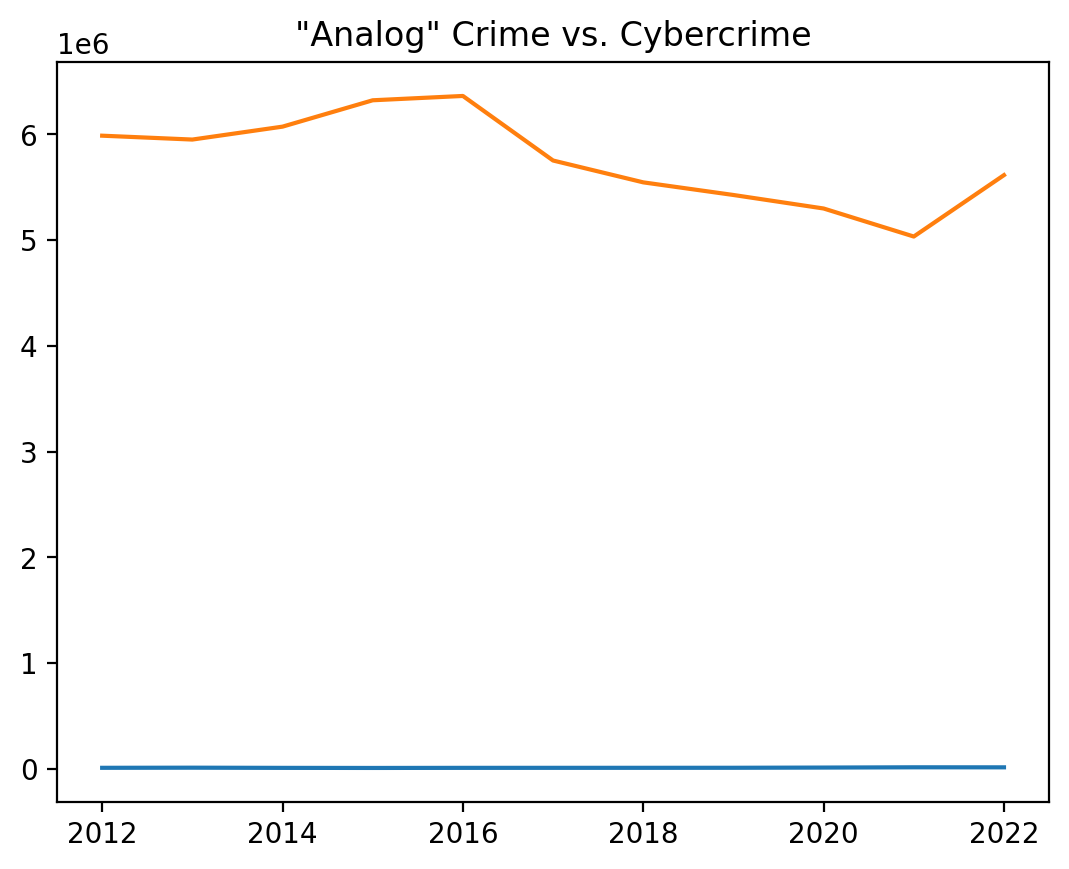

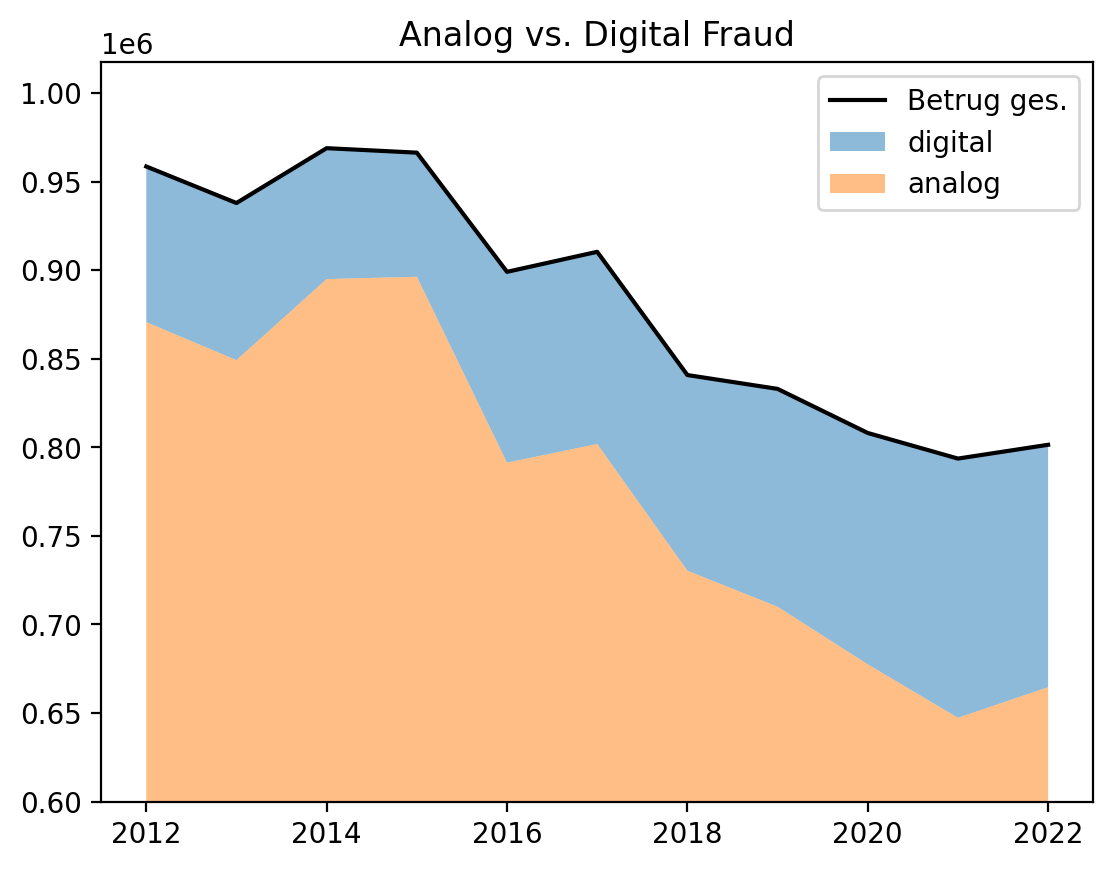

In [8]:
# todo: crime vs cybercrime
cybercrime, crime, computer_betrug, betrug = np.ndarray(11), np.ndarray(11), np.ndarray(11), np.ndarray(11)
for i,year in enumerate(years):
    df = db_t01[year]
    crime[i] = df.loc[df['Schlüssel'] == '------', 'Anzahl erfasste Fälle'].values[0]
    cybercrime[i] = df.loc[df['Schlüssel'] == '543000', 'Anzahl erfasste Fälle'].values[0]

    computer_betrug[i] = df.loc[df['Schlüssel'] == '897000', 'Anzahl erfasste Fälle'].values[0]
    betrug[i] = df.loc[df['Schlüssel'] == '510000', 'Anzahl erfasste Fälle'].values[0]

fig,ax = plt.subplots()
ax.plot(years,cybercrime)
ax.plot(years,crime - cybercrime)
ax.set_title('"Analog" Crime vs. Cybercrime')
    
fig,ax = plt.subplots()
ax.plot(years,betrug,c='black')
ax.fill_between(years,betrug,betrug-computer_betrug,alpha=.5)
ax.fill_between(years,betrug-computer_betrug,0,alpha=.5)
ax.set(title='Analog vs. Digital Fraud',ylim=6e5)
ax.legend(['Betrug ges.','digital','analog'])
plt.xticks(rotation=0)
plt.show()

Creating some plots to visualize the relation between vrimes in gerneal and cybercrimes

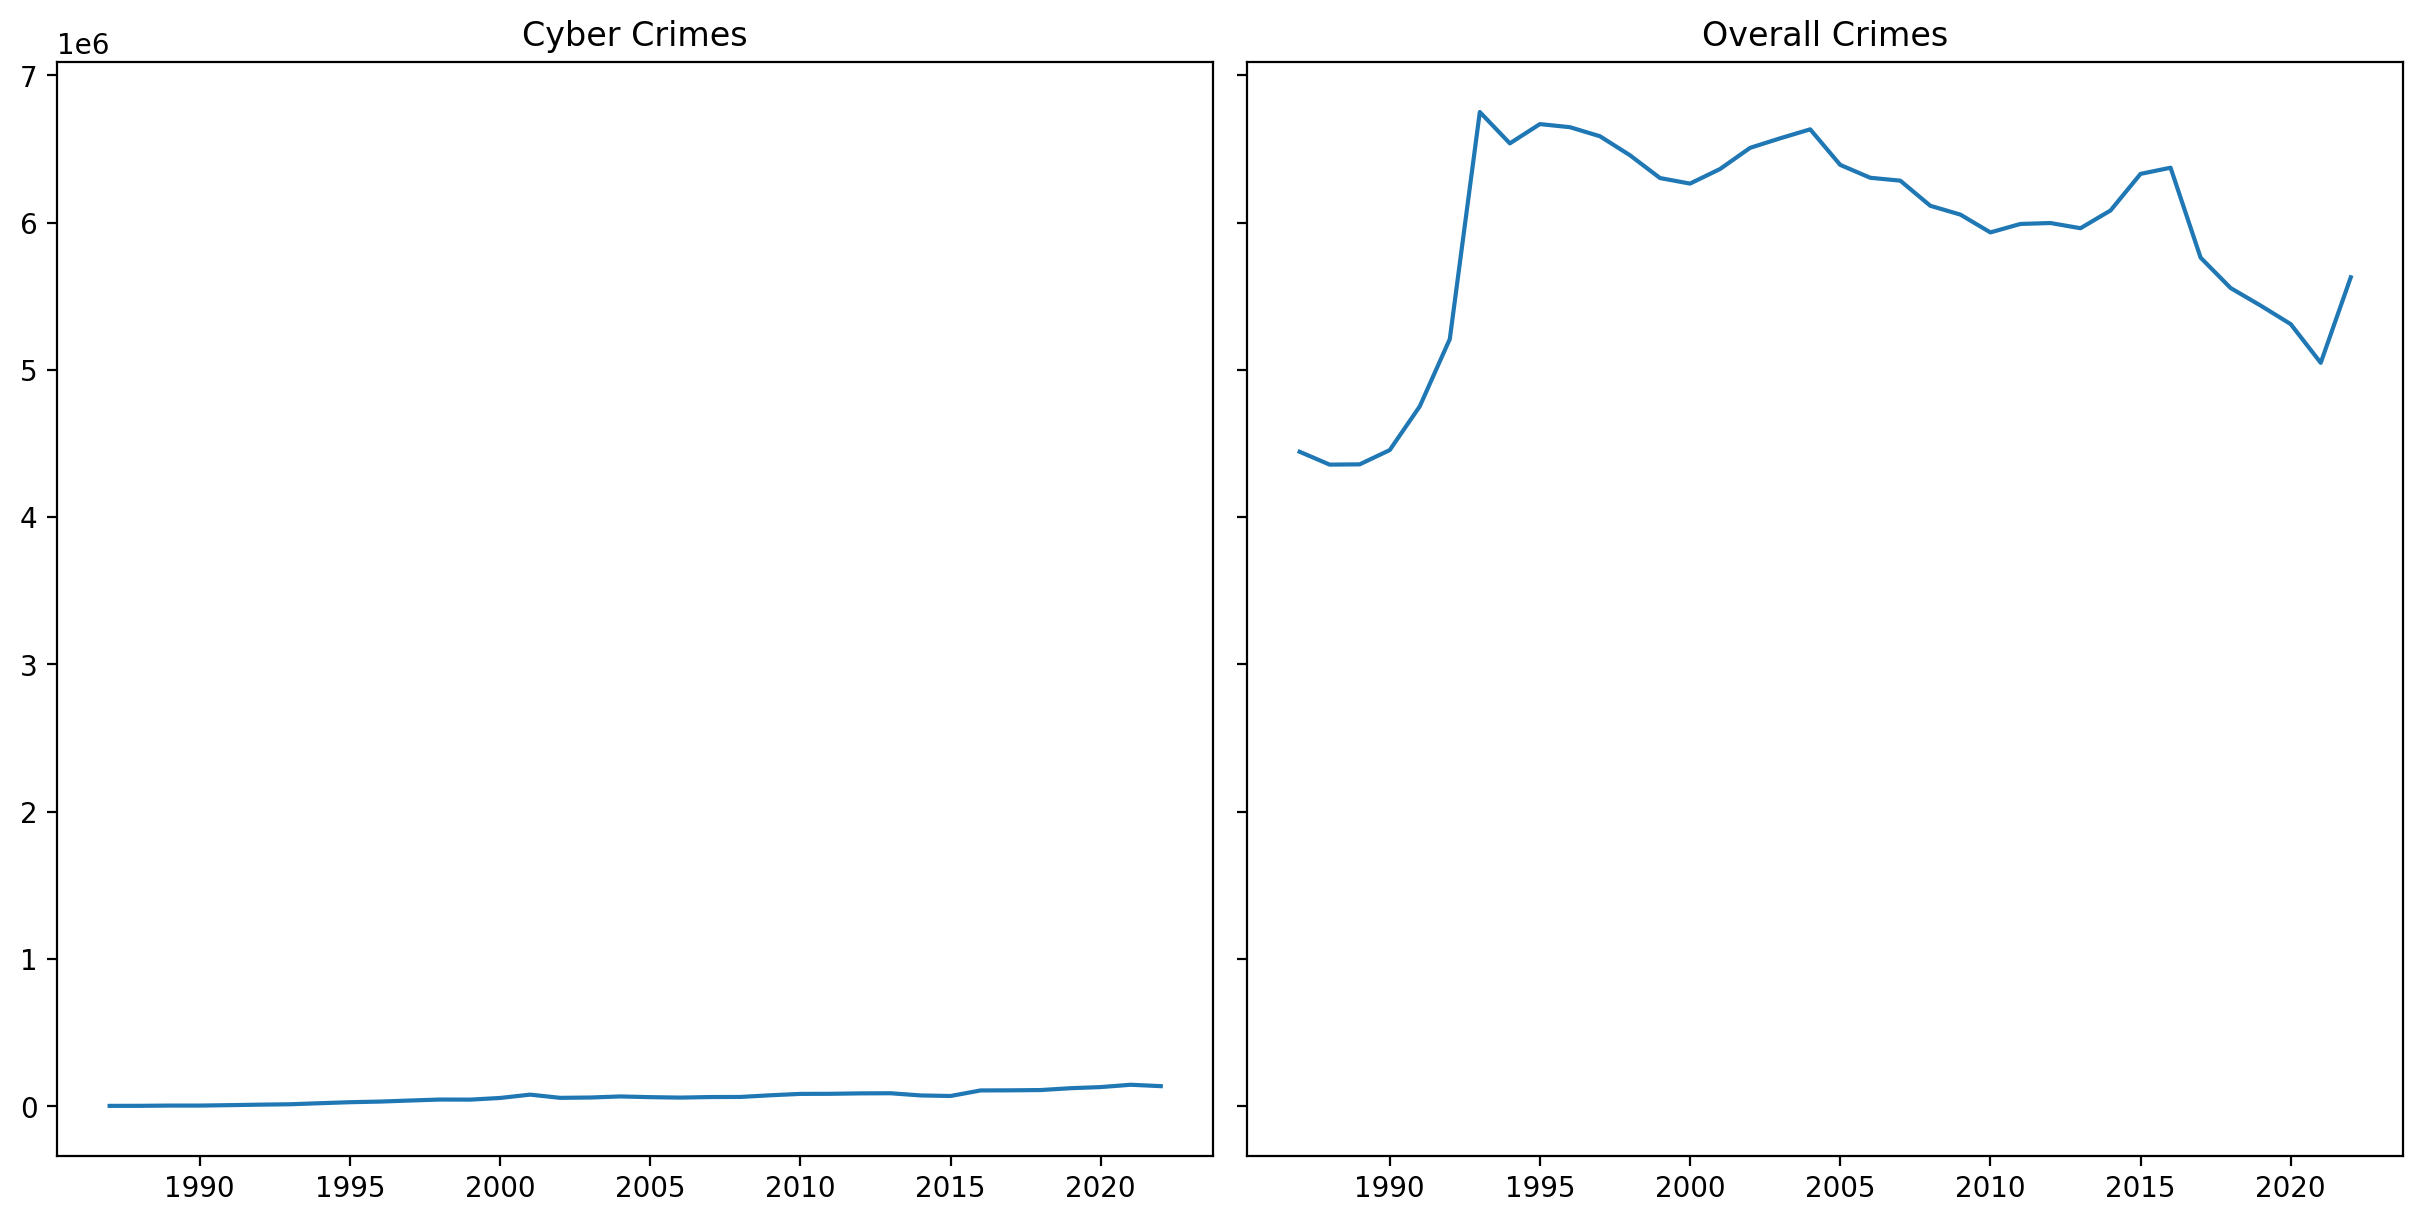

Text(0.5, 0.98, 'Same data & scale, different order :D')

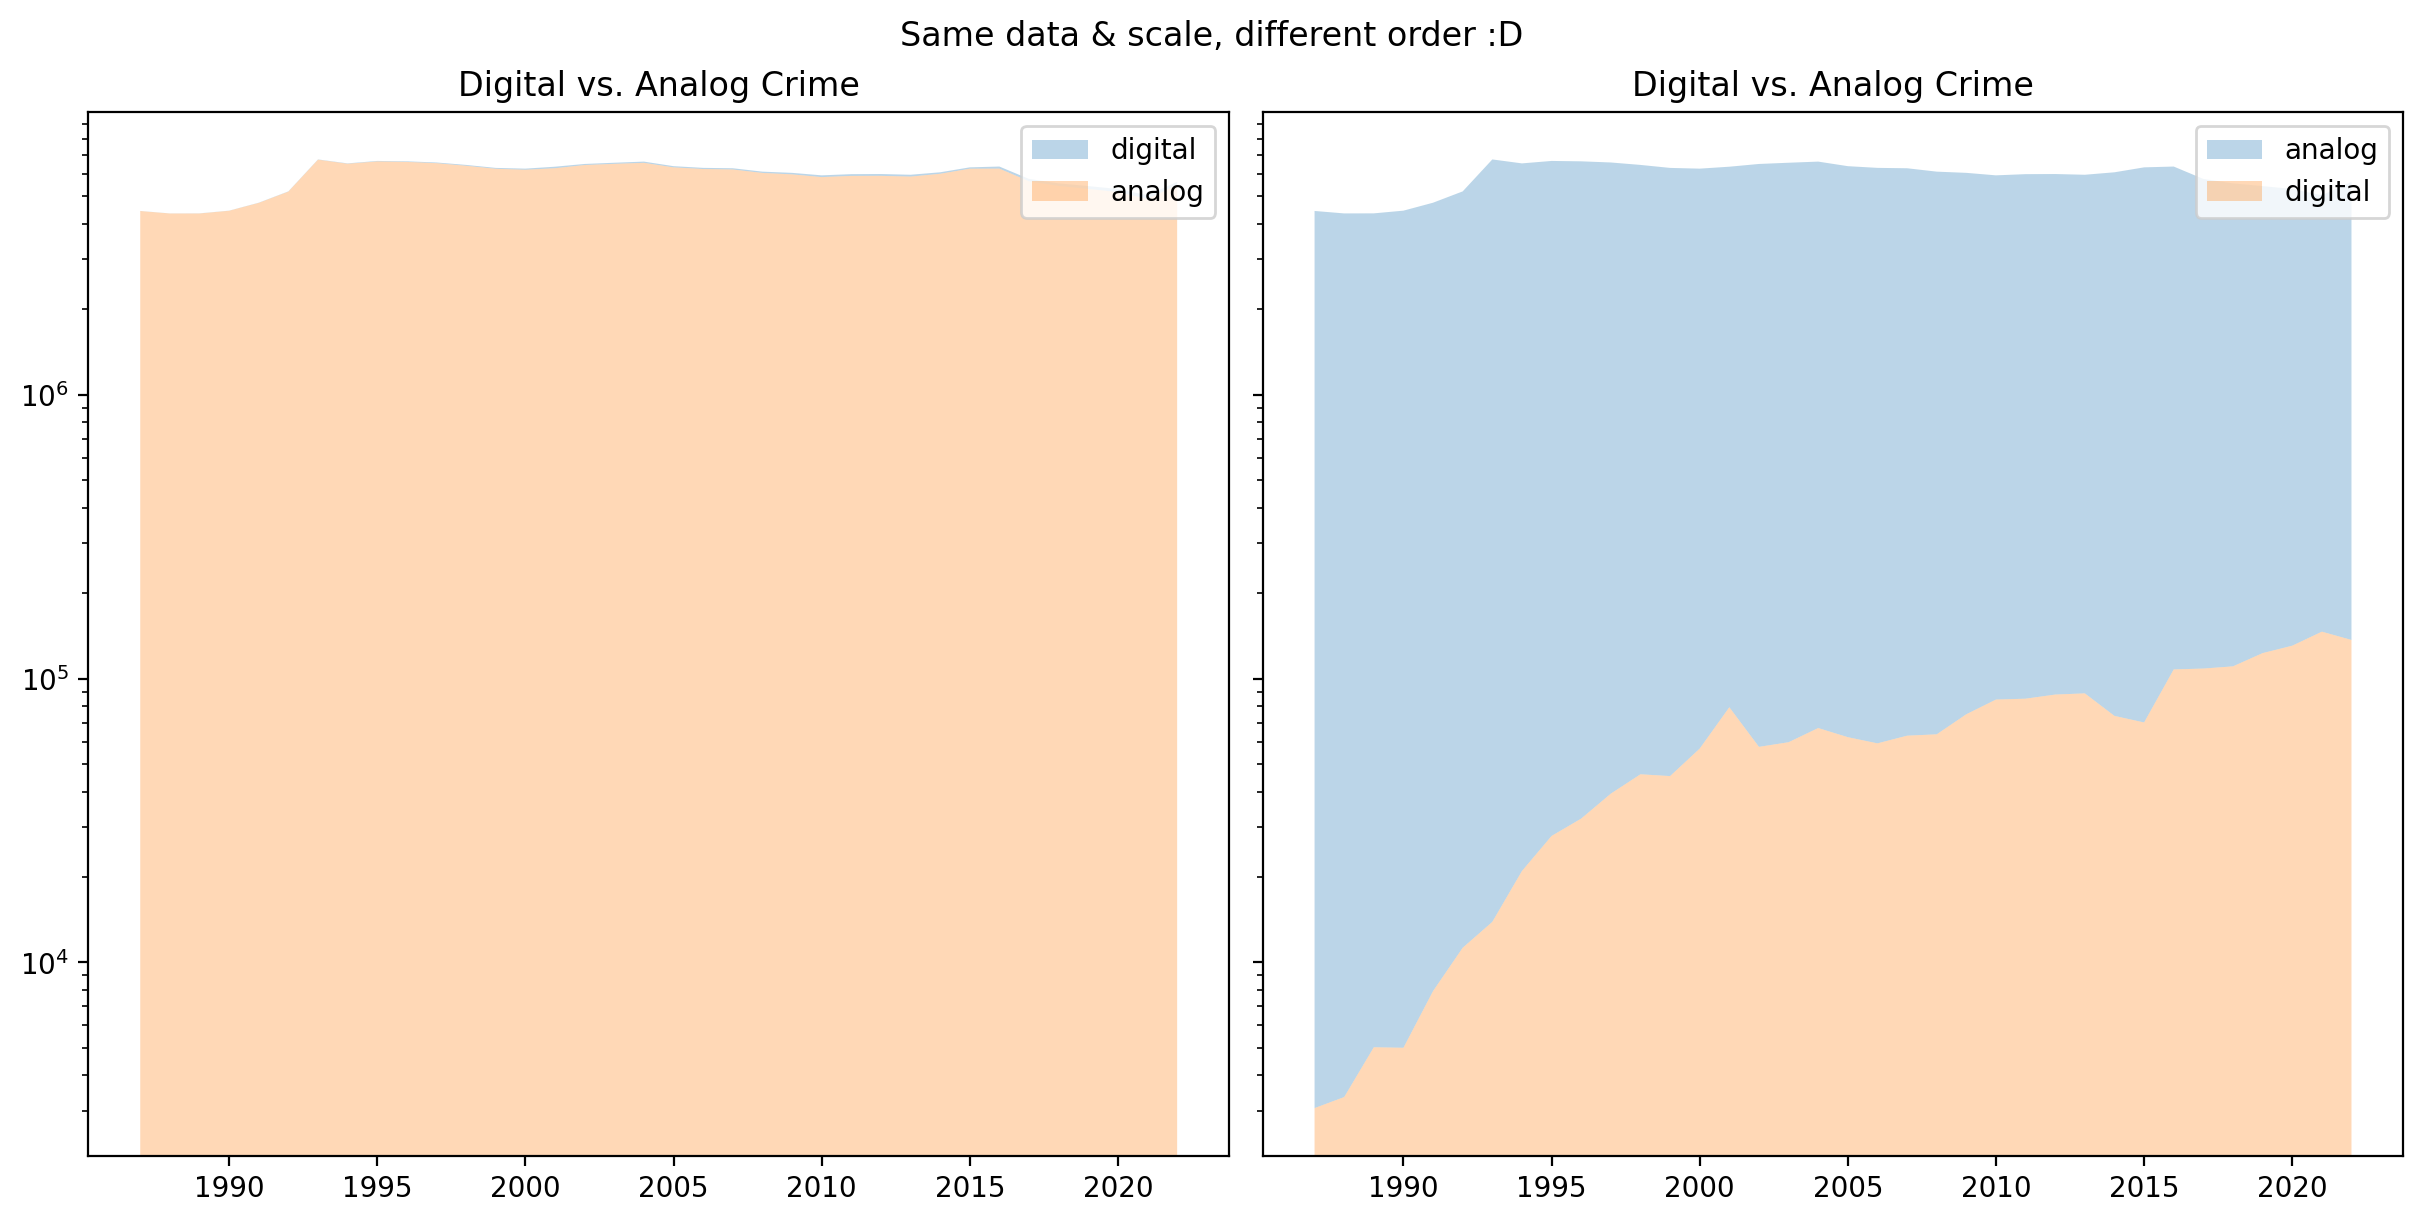

In [9]:
def get_data_times_series(key):
    crime_data = df_z_t01_f[df_z_t01_f['Schluessel'] == key]
    crime_data_years = list(crime_data['Jahr'])
    crime_data_cases = list(crime_data['erfasste Faelle'])
    
    return crime_data, crime_data_years, crime_data_cases

all_crimes, all_crimes_x, all_crimes_y = get_data_times_series('------')
cyber_crimes, cyber_crimes_x, cyber_crimes_y = get_data_times_series('897000')


fig, axs = plt.subplots(1, 2, figsize=(12, 6),sharey=True,layout='constrained')

axs[0].plot(cyber_crimes_x, cyber_crimes_y)
axs[0].set_title('Cyber Crimes')

axs[1].plot(all_crimes_x, all_crimes_y)
axs[1].set_title('Overall Crimes')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 6),sharey=True,layout='constrained')
axs[0].fill_between(all_crimes_x, all_crimes_y,np.asarray(all_crimes_y) - np.asarray(cyber_crimes_y), alpha=.3)
axs[0].fill_between(all_crimes_x, np.asarray(all_crimes_y) - np.asarray(cyber_crimes_y),0,alpha=.3)
axs[0].set(yscale='log',title='Digital vs. Analog Crime')
axs[0].legend(['digital','analog'])

axs[1].fill_between(all_crimes_x, np.asarray(all_crimes_y), np.asarray(cyber_crimes_y),alpha=.3)
axs[1].fill_between(all_crimes_x, np.asarray(cyber_crimes_y),0, alpha=.3)
axs[1].set(yscale='log',title='Digital vs. Analog Crime')
axs[1].legend(['analog','digital'])
fig.suptitle('Same data & scale, different order :D')


What we could say using this type of plot:
1. Overall crime has been almost constant in it's magnitude
2. Cybercrime, although very low in comparison, has grown almost exponentially (linear in log scale) for many years

In [10]:
# Return Pearson product-moment correlation coefficients
print(np.corrcoef(all_crimes_y, cyber_crimes_y))

[[1.         0.15108436]
 [0.15108436 1.        ]]


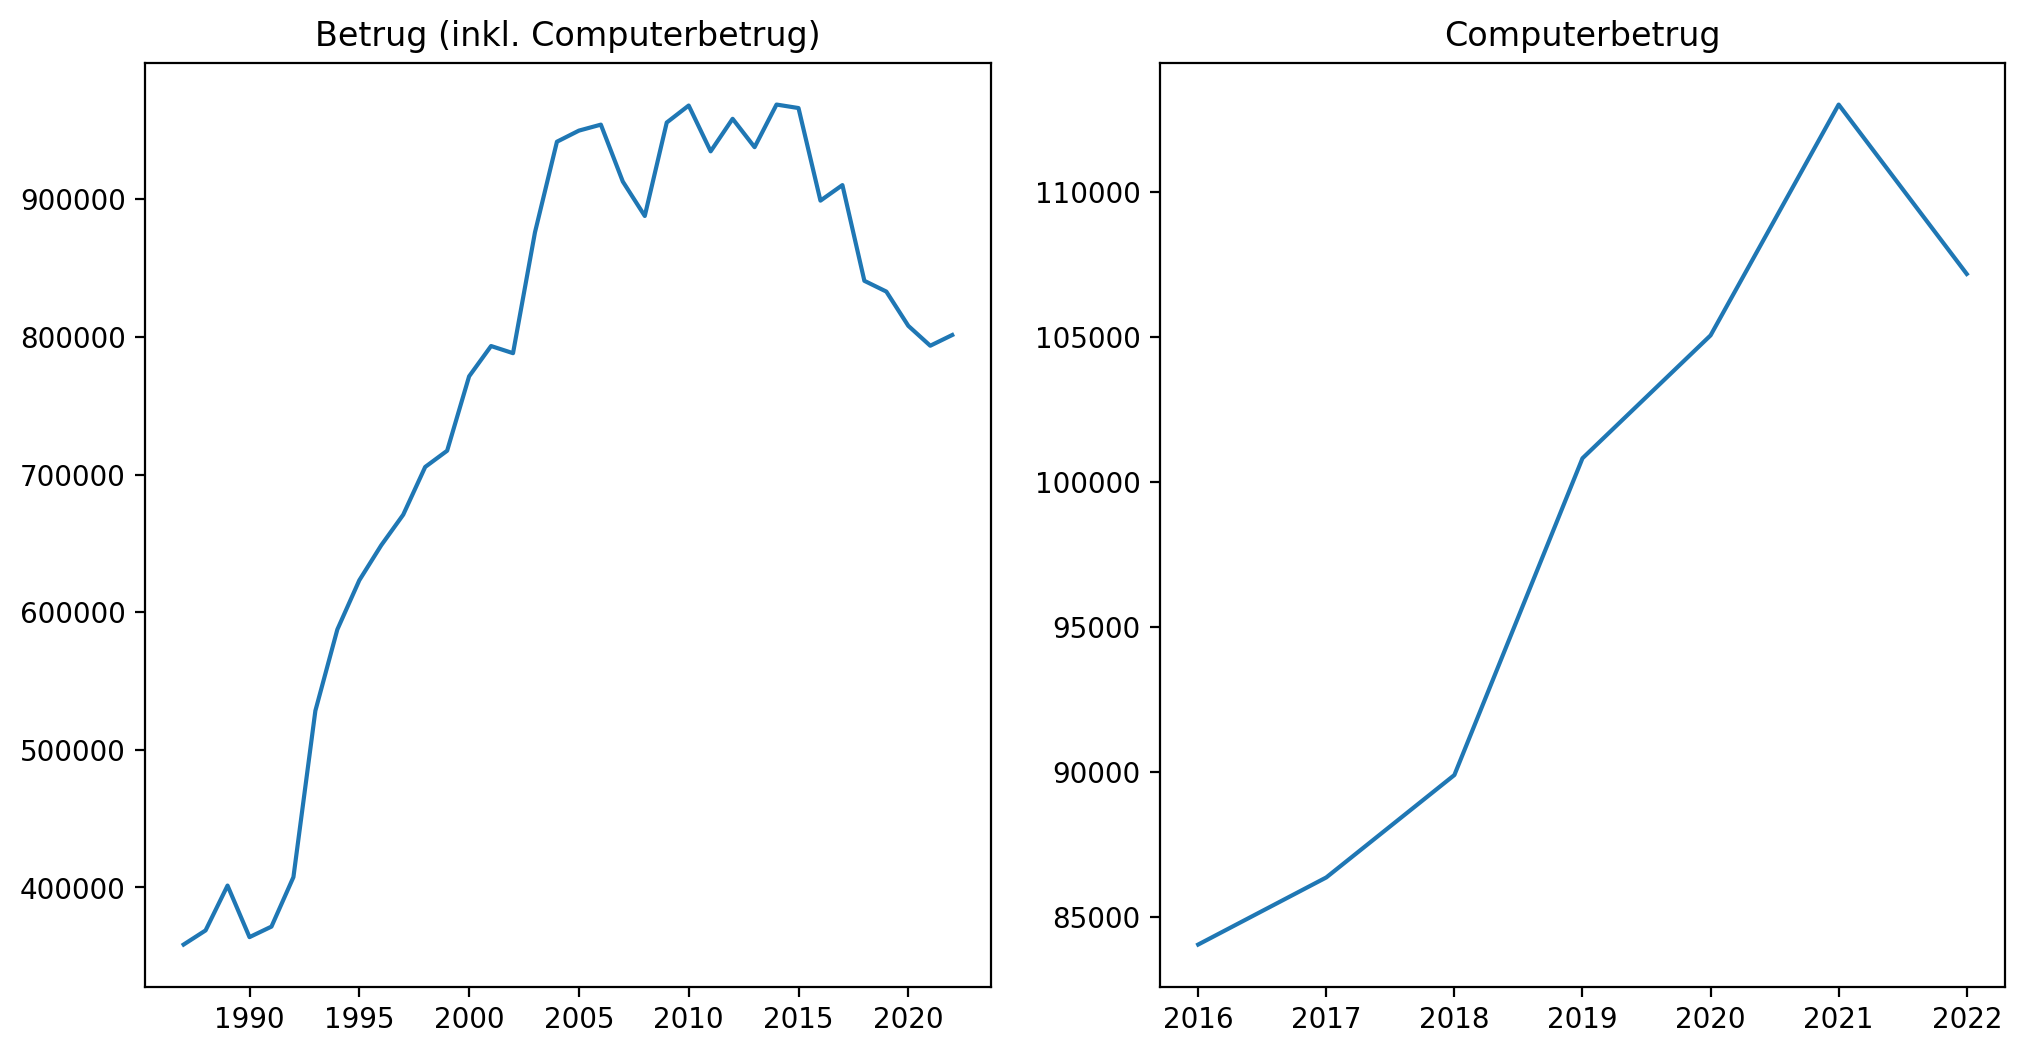

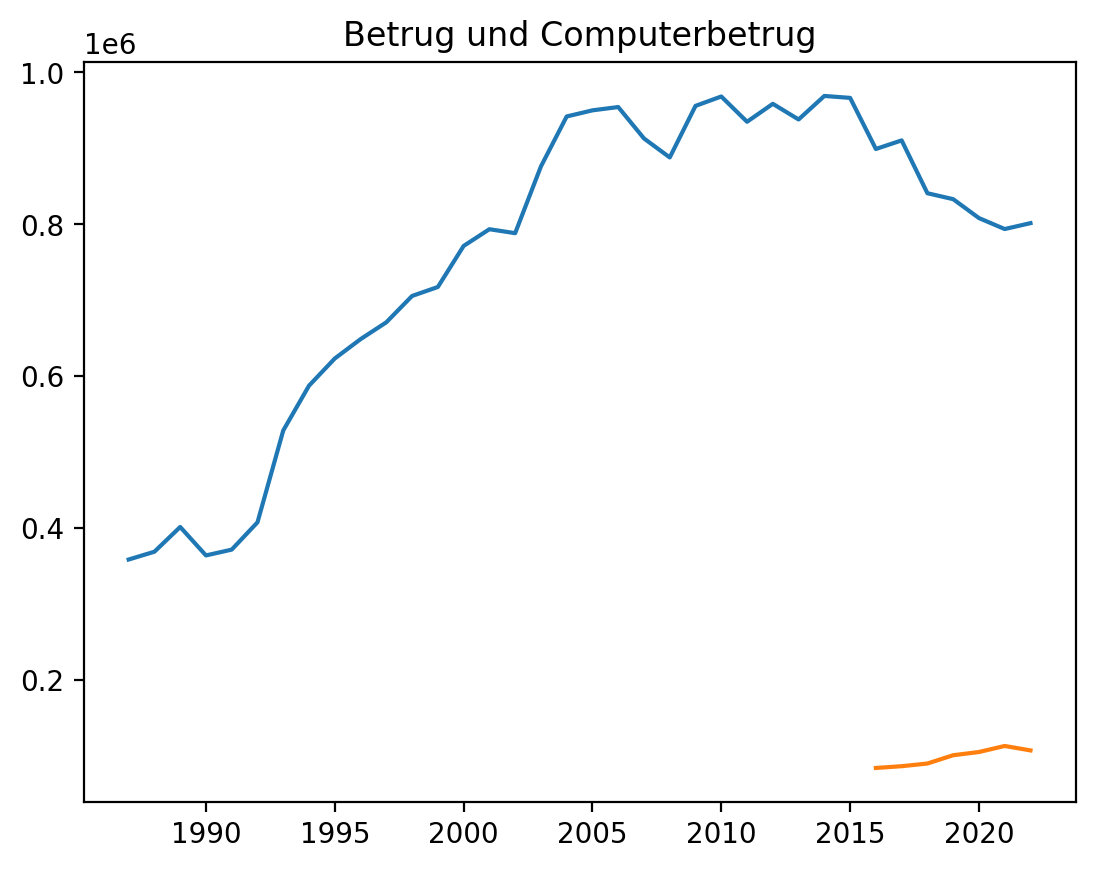

In [11]:
computerbetrug, computerbetrug_x, computerbetrug_y = get_data_times_series('897100')
betrug, betrug_x, betrug_y = get_data_times_series('510000')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(betrug_x, betrug_y)
axs[0].set_title('Betrug (inkl. Computerbetrug)')

axs[1].plot(computerbetrug_x, computerbetrug_y)
axs[1].set_title('Computerbetrug')
plt.show()
plt.close()

plt.title('Betrug und Computerbetrug')
plt.plot(betrug_x, betrug_y)
plt.plot(computerbetrug_x, computerbetrug_y)


### Relationship between Betrug and Computerbetrug

There seems to be a strong negative correlation between Betrug and Computerbetrug.  
Data for Computerbetrug is only available from 2016


Pearson product-moment correlation coefficients of Betrug and Computerbetrug
[[ 1.         -0.92993189]
 [-0.92993189  1.        ]]


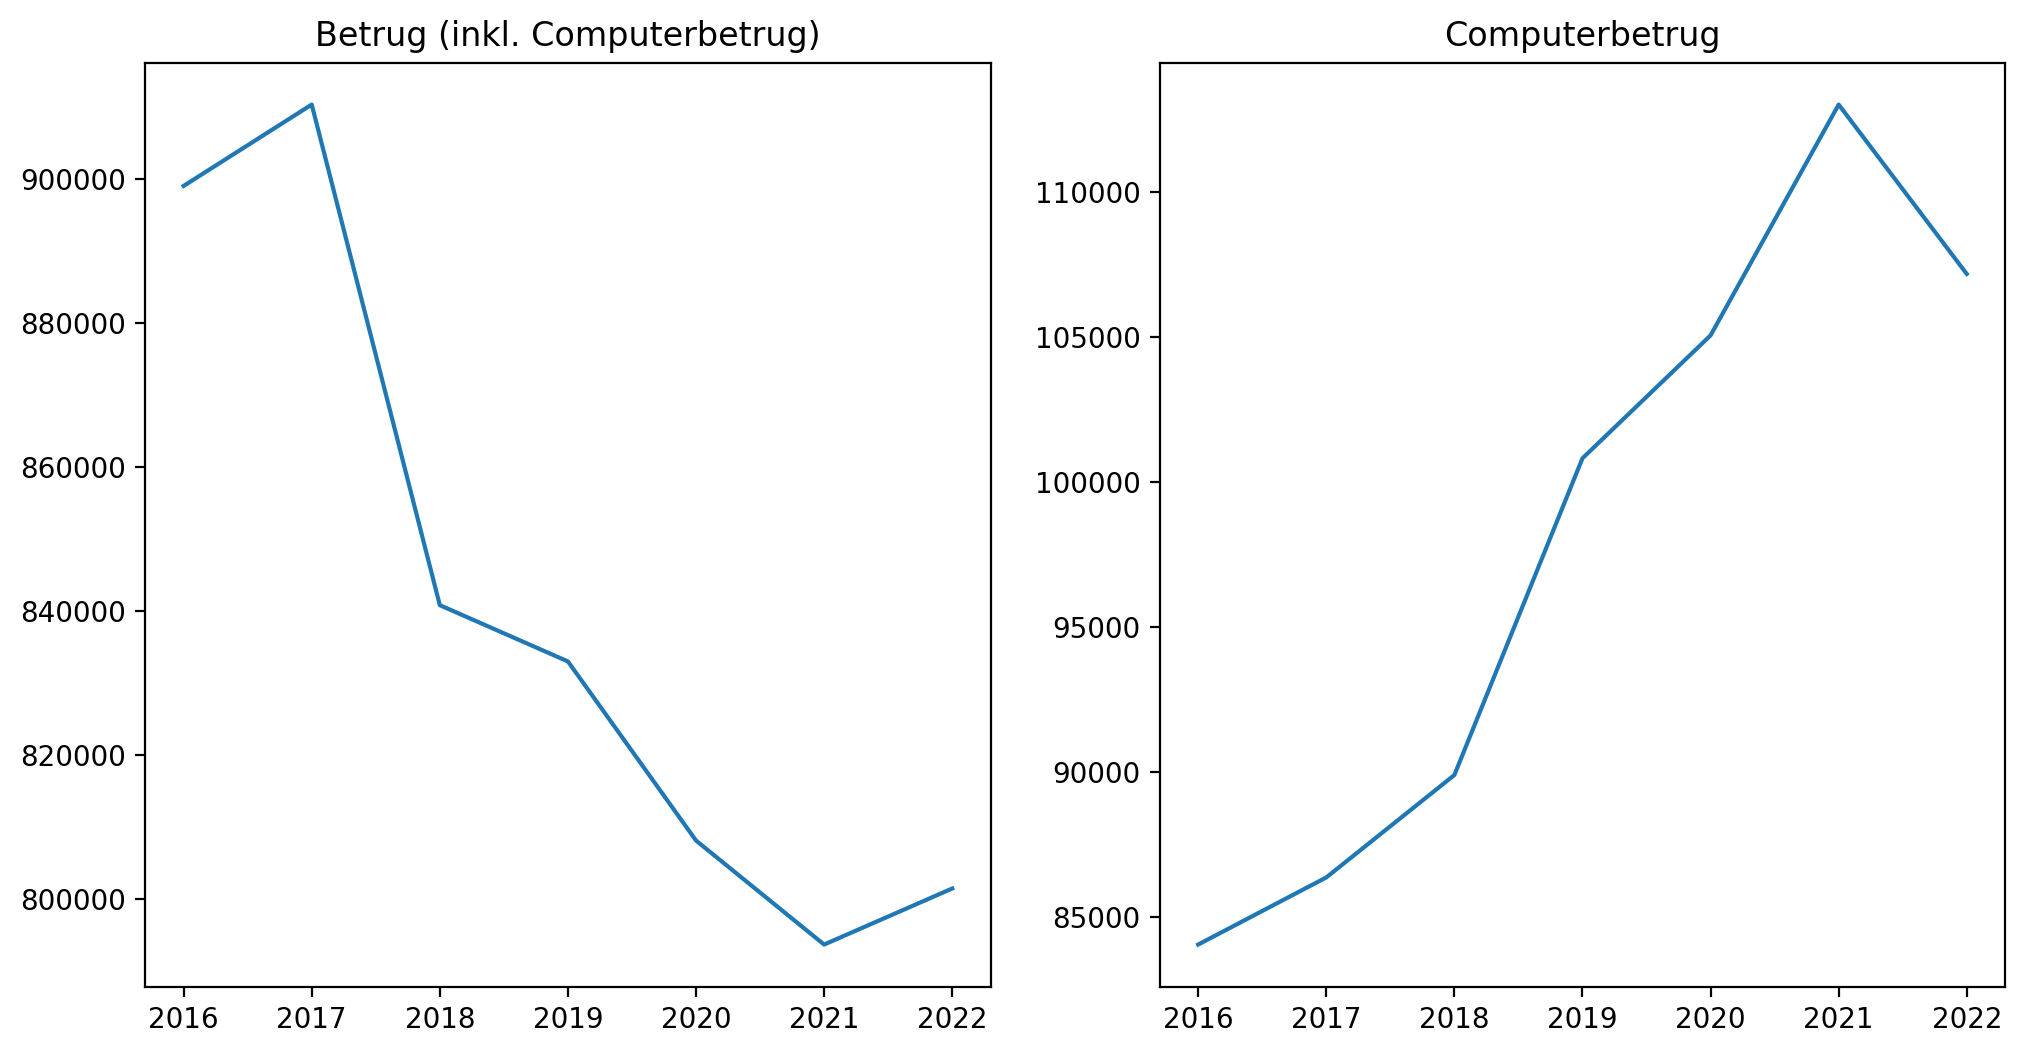

In [12]:
n = len(computerbetrug_y)

# print(betrug_y)
# print(betrug_y[-n:])
# print(computerbetrug_y)

print('Pearson product-moment correlation coefficients of Betrug and Computerbetrug')
print(np.corrcoef(betrug_y[-n:], computerbetrug_y))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(computerbetrug_x, betrug_y[-n:])
axs[0].set_title('Betrug (inkl. Computerbetrug)')

axs[1].plot(computerbetrug_x, computerbetrug_y)
axs[1].set_title('Computerbetrug')
plt.show()
plt.close()


/tmp/ipykernel_13920/333263627.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


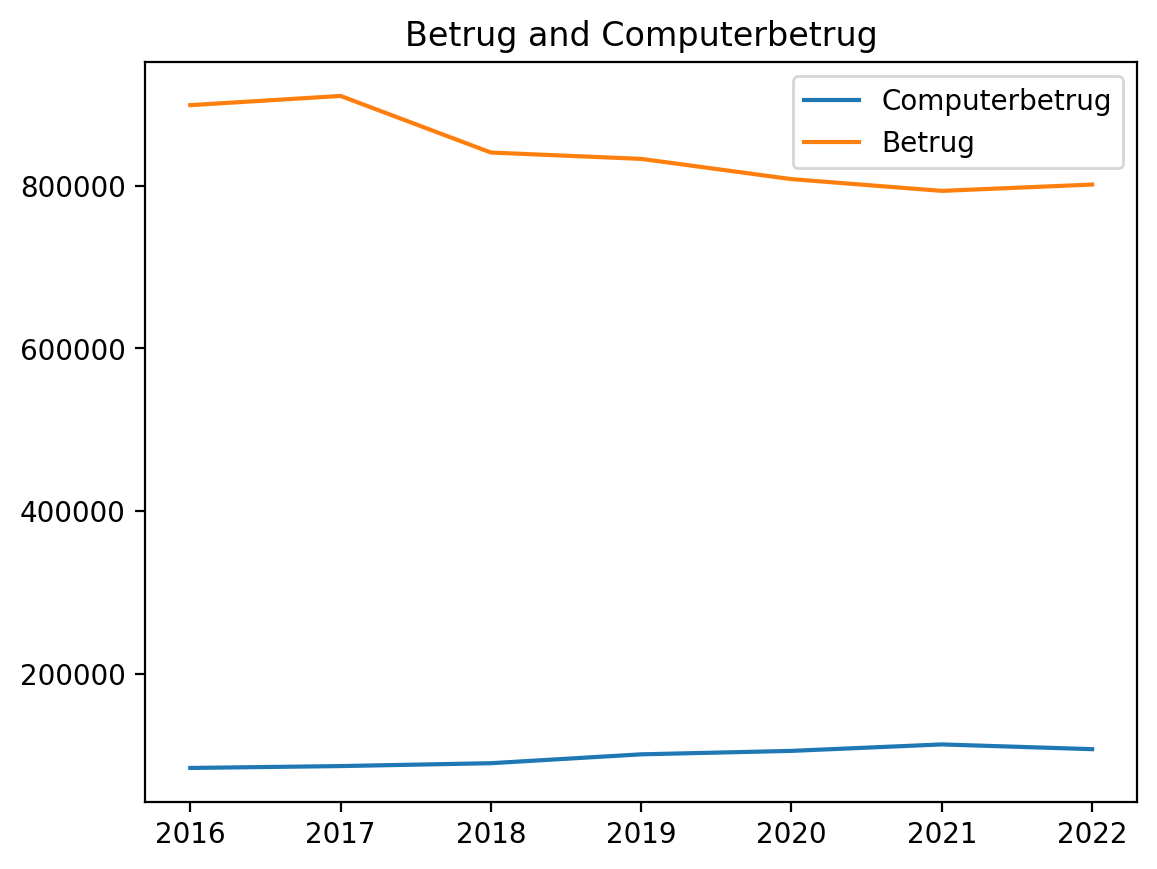

In [13]:
fig, ax = plt.subplots()
ax.plot(computerbetrug_x, computerbetrug_y)
ax.plot(computerbetrug_x, betrug_y[-n:])
ax.legend(['Computerbetrug','Betrug'])
ax.set_title('Betrug and Computerbetrug')
#ax.set_yscale('log')
fig.show()

## Monthly Data

### Data Loader for T-08 (Monthly data)

Different years have different formats and names for table T 08. Therefore dataloader has to read excel files different, depending on the year

Doesn't work for older data yet, because excel tables use a different format.

### Getting monthly data

In [14]:
# list of dataframes representing T08 from different years
df_years = list()
for i in years:
    df_years.append(db_t08[i])

# entries in month equal the column names in the df in df_years
months = ['Jan.', 'Febr.', 'März', 'April', 'Mai', 'Juni', 'Juli', 'Aug.', 'Sept.', 'Okt.', 'Nov.', 'Dez.']



In the Table 08 of 2017 there is a change in the key 510000 (Betrug). Therefore the key is there twice in two rows  
&rarr; Which one do we have to use?/does one include the other?/ Can we just add them up?

In excel table row 516&517

Same Problem in 2013

In [15]:
# returns list of lists. Each list represents one year and contains cases of certain crime from Jan. to Dec.
def get_cases_by_year(key, data, sum_same_key):
    cases_by_year = list()
    for df in data:
        cases_curr_year = list()            
        for month in months:
            if sum_same_key:
                # summing up the entries in df that have an identical key
                cases_month = 0
                for i in range(len(df[month][df['Schlüssel'] == key])):
                    cases_month += df[month][df['Schlüssel'] == key].iloc[i]
            else:
                # taking only the first entry that uses the key in df
                cases_month = df[month][df['Schlüssel'] == key].iloc[0]
            
            cases_curr_year.append(cases_month)
            
        cases_by_year.append(cases_curr_year)

    return(cases_by_year)

### Getting data for Betrug and Computerbetrung

#### Running into some issues with the keys used for computerfraud in T-08 from different years

517500 - Computerbetrug key until 2015  
897100 - Computerbetrug key after 2015

However, key 517500 is still used later for sonstiger Computerbetrug

In [101]:

# Betrug
betrug_cases = get_cases_by_year('510000', df_years, True)

# Computerbetrug
# Key change in 2016 -> get_cases_year has to be called with different keys and the correspoinging data from the years

ind_2015 = 4
df_years_2012_to_2015 = df_years[ :ind_2015]
df_years_2016_to_2022 = df_years[ind_2015:]

computerbetrug_cases = get_cases_by_year('517500', df_years_2012_to_2015, True)
computerbetrug_cases_after_2015 = get_cases_by_year('897100', df_years_2016_to_2022, True)

for year in computerbetrug_cases_after_2015:
    computerbetrug_cases.append(year)


### Visualization: Fraud and Computerfraud From 2016 to 2022

In [17]:
# Get flattend list of months of years for the x-axis label
def create_x_labels(years):
    months_for_x = ['Jan.', 'Febr.', 'März', 'April', 'Mai', 'Juni', 'Juli', 'Aug.', 'Sept.', 'Okt.', 'Nov.', 'Dez.']
    months_year = list()
    for i in years:
        with_year = list(month + ' ' + str(i) for month in months_for_x)
        months_year.append(with_year)
    
    flat_months_year = [element for year in months_year for element in year]
    return flat_months_year

[74084, 67799, 76251, 64905, 69094, 66670, 67562, 64319, 59157, 59526, 53566, 43278, 72846, 69803, 71740, 69816, 70047, 68197, 70935, 66316, 62246, 61802, 56726, 46998, 77336, 71453, 75792, 72096, 72806, 68779, 70984, 64886, 62987, 60715, 54304, 47254, 74900, 71260, 77546, 69677, 67910, 70271, 70244, 63115, 59859, 58693, 53757, 45697, 71575, 68909, 68294, 64505, 63170, 63865, 59935, 57899, 54562, 52932, 50102, 45315, 68836, 63364, 69626, 62084, 64538, 62793, 65843, 59074, 54021, 53945, 52232, 41101, 64536, 59092, 59087, 61670, 59193, 57114, 58077, 56032, 51859, 52887, 48453, 38144, 65980, 60773, 60313, 64906, 59479, 57444, 60782, 56254, 54698, 55805, 52140, 41987, 71323, 60840, 54680, 45617, 56073, 59485, 61693, 55538, 53552, 52877, 50203, 41045, 59758, 54334, 61906, 55690, 58860, 55116, 55332, 54433, 53456, 54735, 50676, 40351, 58410, 56727, 64734, 66097, 62331, 52215, 51619, 51532, 52441, 53431, 49865, 41339]
[2180, 2074, 1999, 1651, 1990, 1958, 2017, 1716, 1468, 1495, 1382, 1159, 18

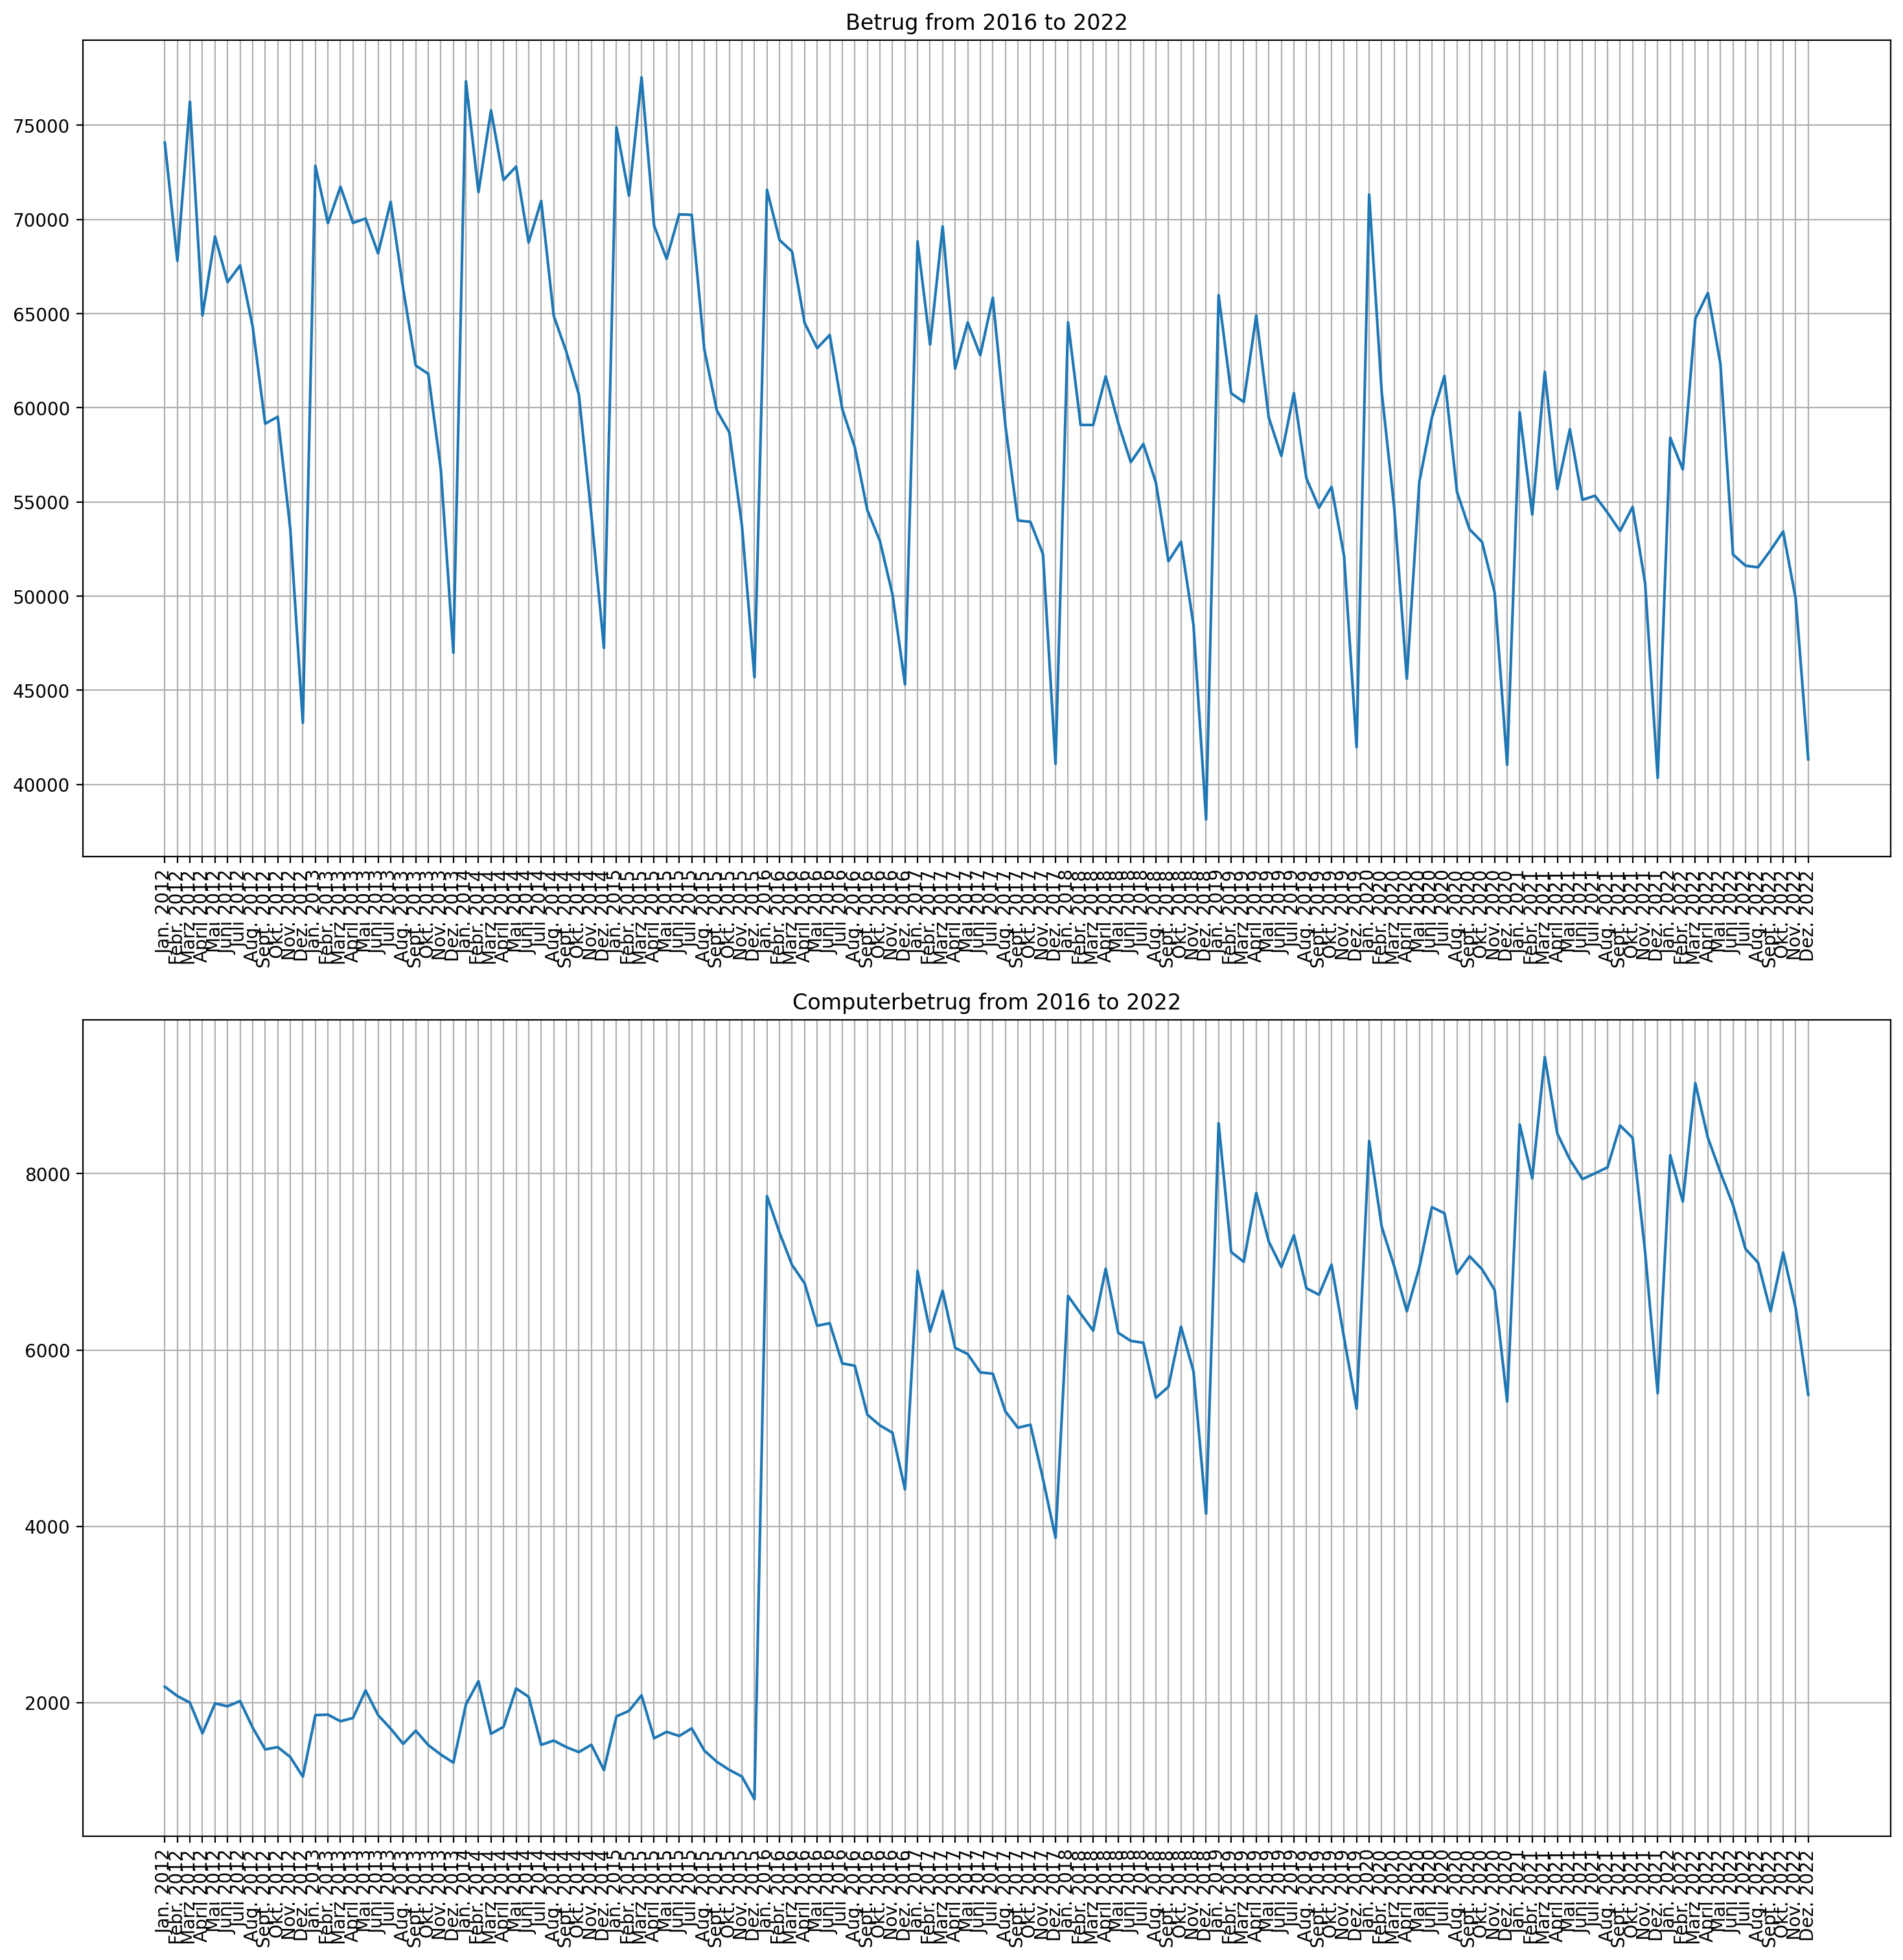

In [18]:
# create x labels
x_labels_monthly = create_x_labels(years)

# Flatten lists with cases of crimes

flat_betrug_cases = [element for year in betrug_cases for element in year]
flat_computerbetrug_cases = [element for year in computerbetrug_cases for element in year]

print(flat_betrug_cases)
print(flat_computerbetrug_cases)


# plot crimes 
fig, axs = plt.subplots(2, 1, figsize=(18, 18))
axs[0].plot(x_labels_monthly, flat_betrug_cases)
axs[0].set_title('Betrug from 2016 to 2022')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(True)

axs[1].plot(x_labels_monthly, flat_computerbetrug_cases)
axs[1].set_title('Computerbetrug from 2016 to 2022')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(True)


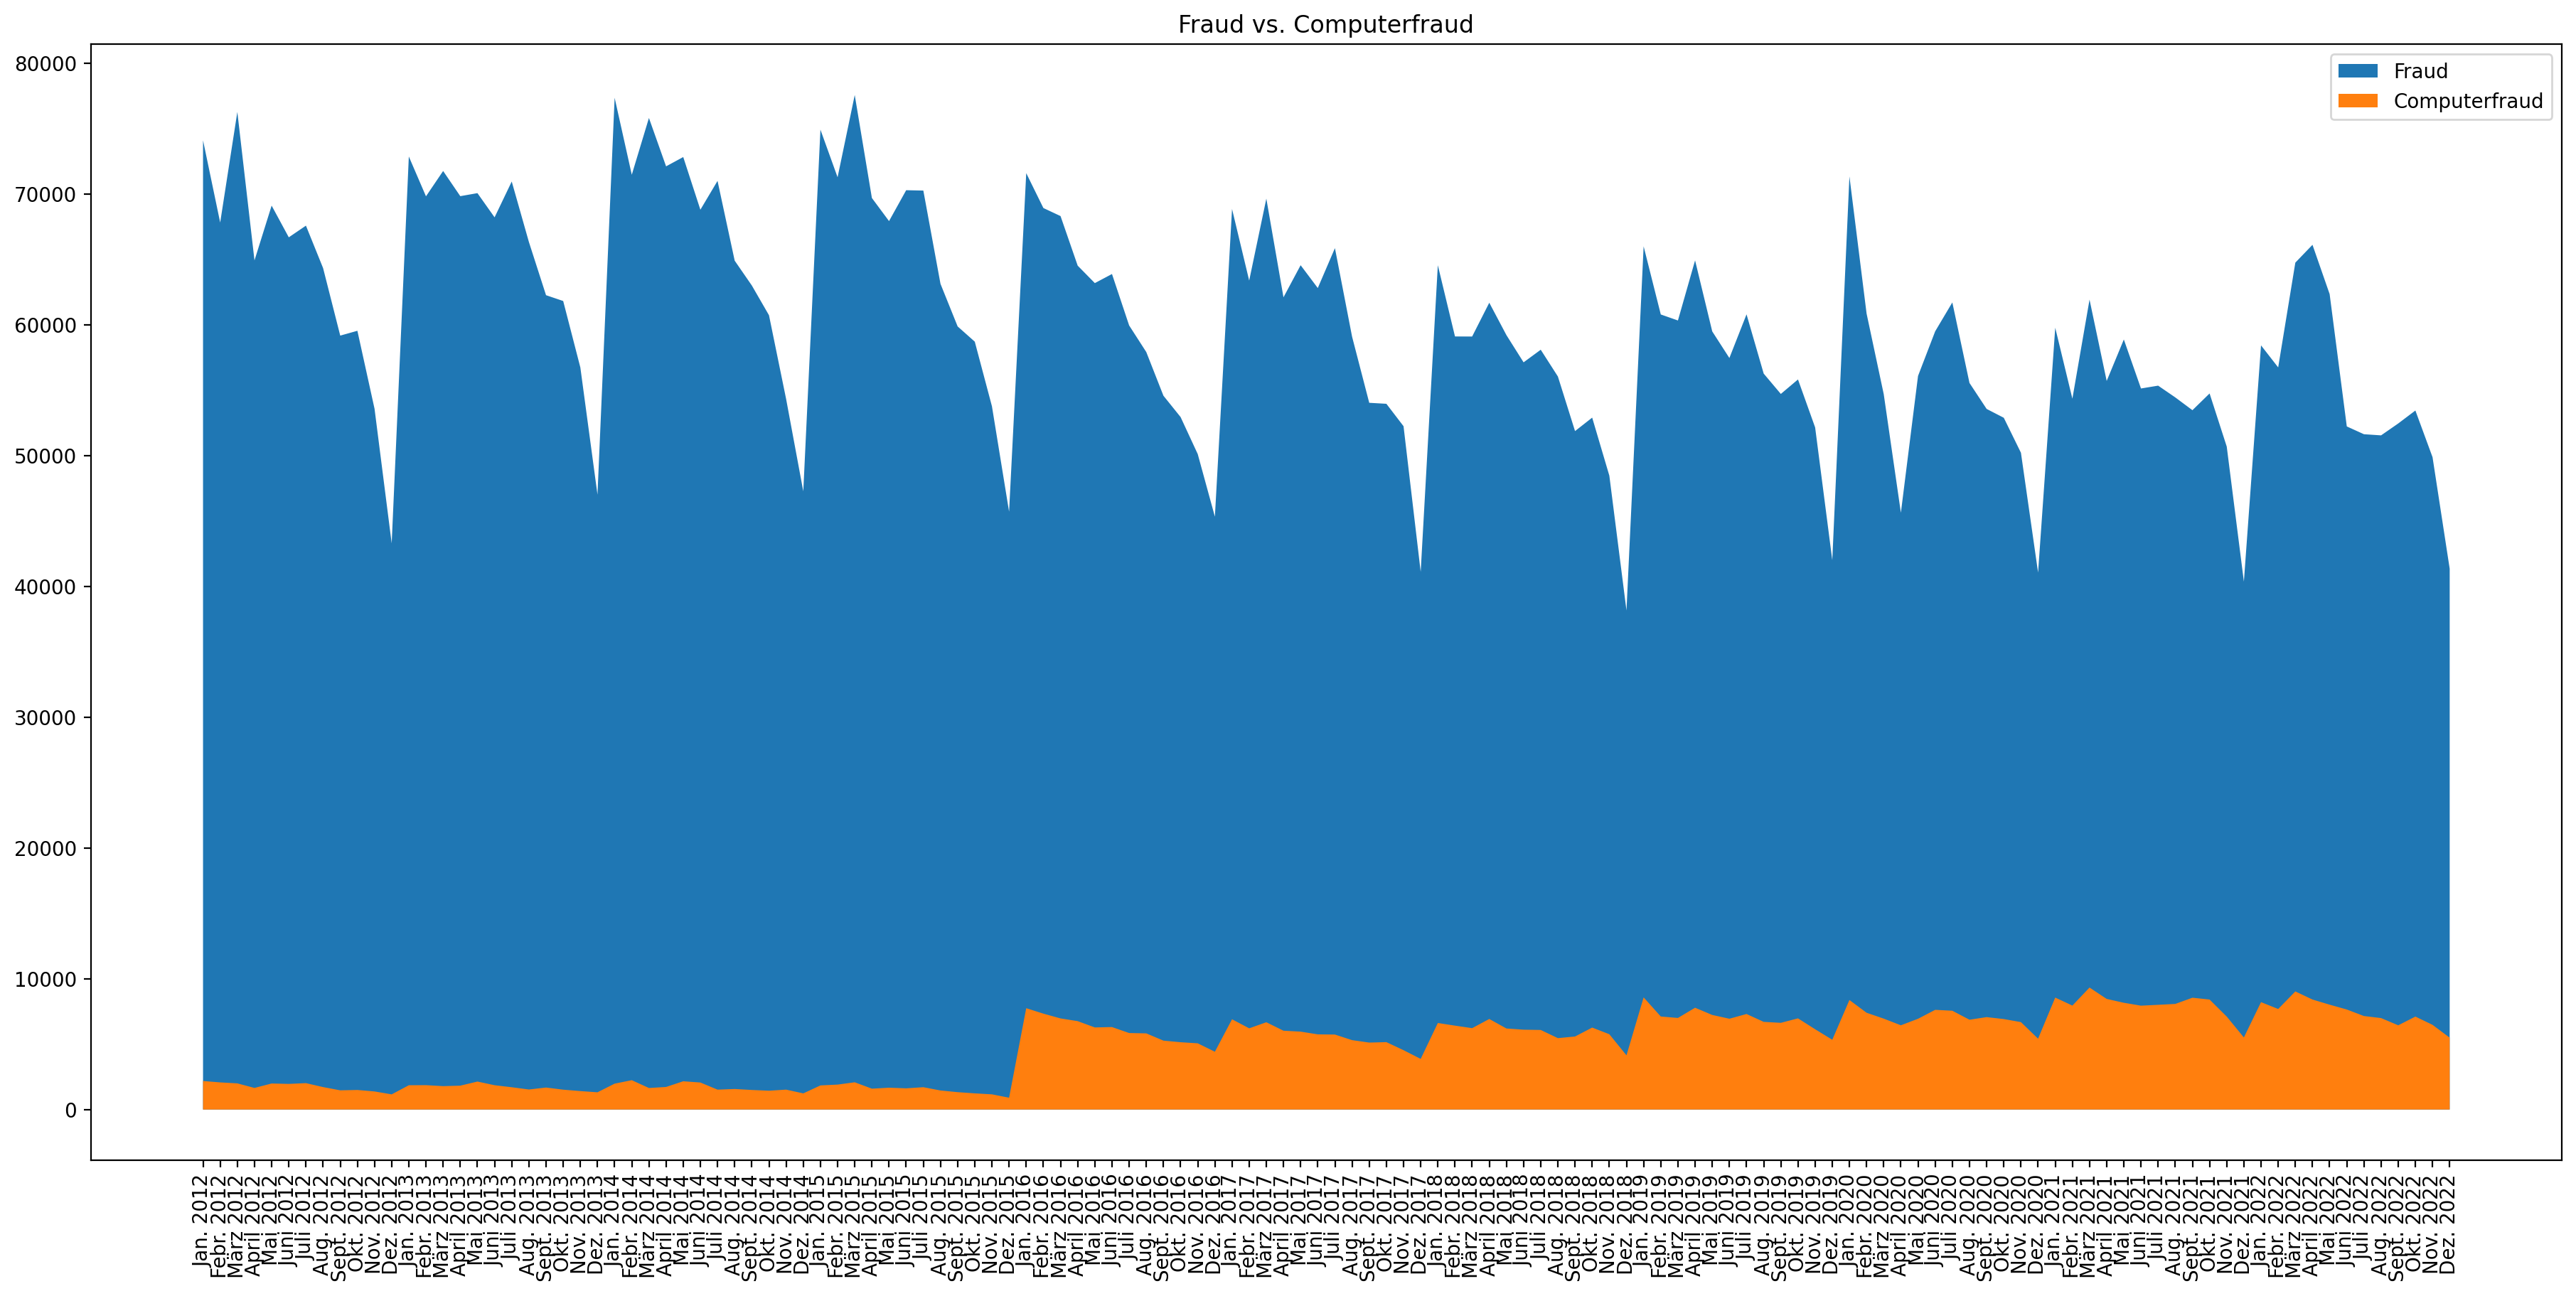

In [19]:
fig, axs = plt.subplots(sharey=True, layout='constrained', figsize=(18,9))
axs.fill_between(x_labels_monthly, flat_betrug_cases)
axs.fill_between(x_labels_monthly,flat_computerbetrug_cases)
axs.set(yscale='linear', title='Fraud vs. Computerfraud')
axs.legend(['Fraud', 'Computerfraud'])
axs.tick_params(axis='x', rotation=90)

We saw a strong negative correlation between fraud and computerfraud between 2016 and 2022 using fraud and computerfraud, using yearly data.  
Using monthly data we can see a moderate to strong posive correaltion.

In [20]:
# Correlation between 2012 and 2022 (monthly data)
print('Correlation between fraud and cyberfraud between 2012 and 2022 (monthly data):', 
     '{:.5f}'.format(np.corrcoef(flat_betrug_cases, flat_computerbetrug_cases)[0,1]))

# Correlation for Covid Years: 2020 & 2021 (monthly data)
n = len(flat_betrug_cases)
two_years= n - 24
print('Correlation between fraud and cyberfraud between 2020 and 2021 (monthly data):', 
     '{:.5f}'.format(np.corrcoef(flat_betrug_cases[two_years:], flat_computerbetrug_cases[two_years:])[0,1]))

Correlation between fraud and cyberfraud between 2012 and 2022 (monthly data): -0.29064
Correlation between fraud and cyberfraud between 2020 and 2021 (monthly data): 0.86241


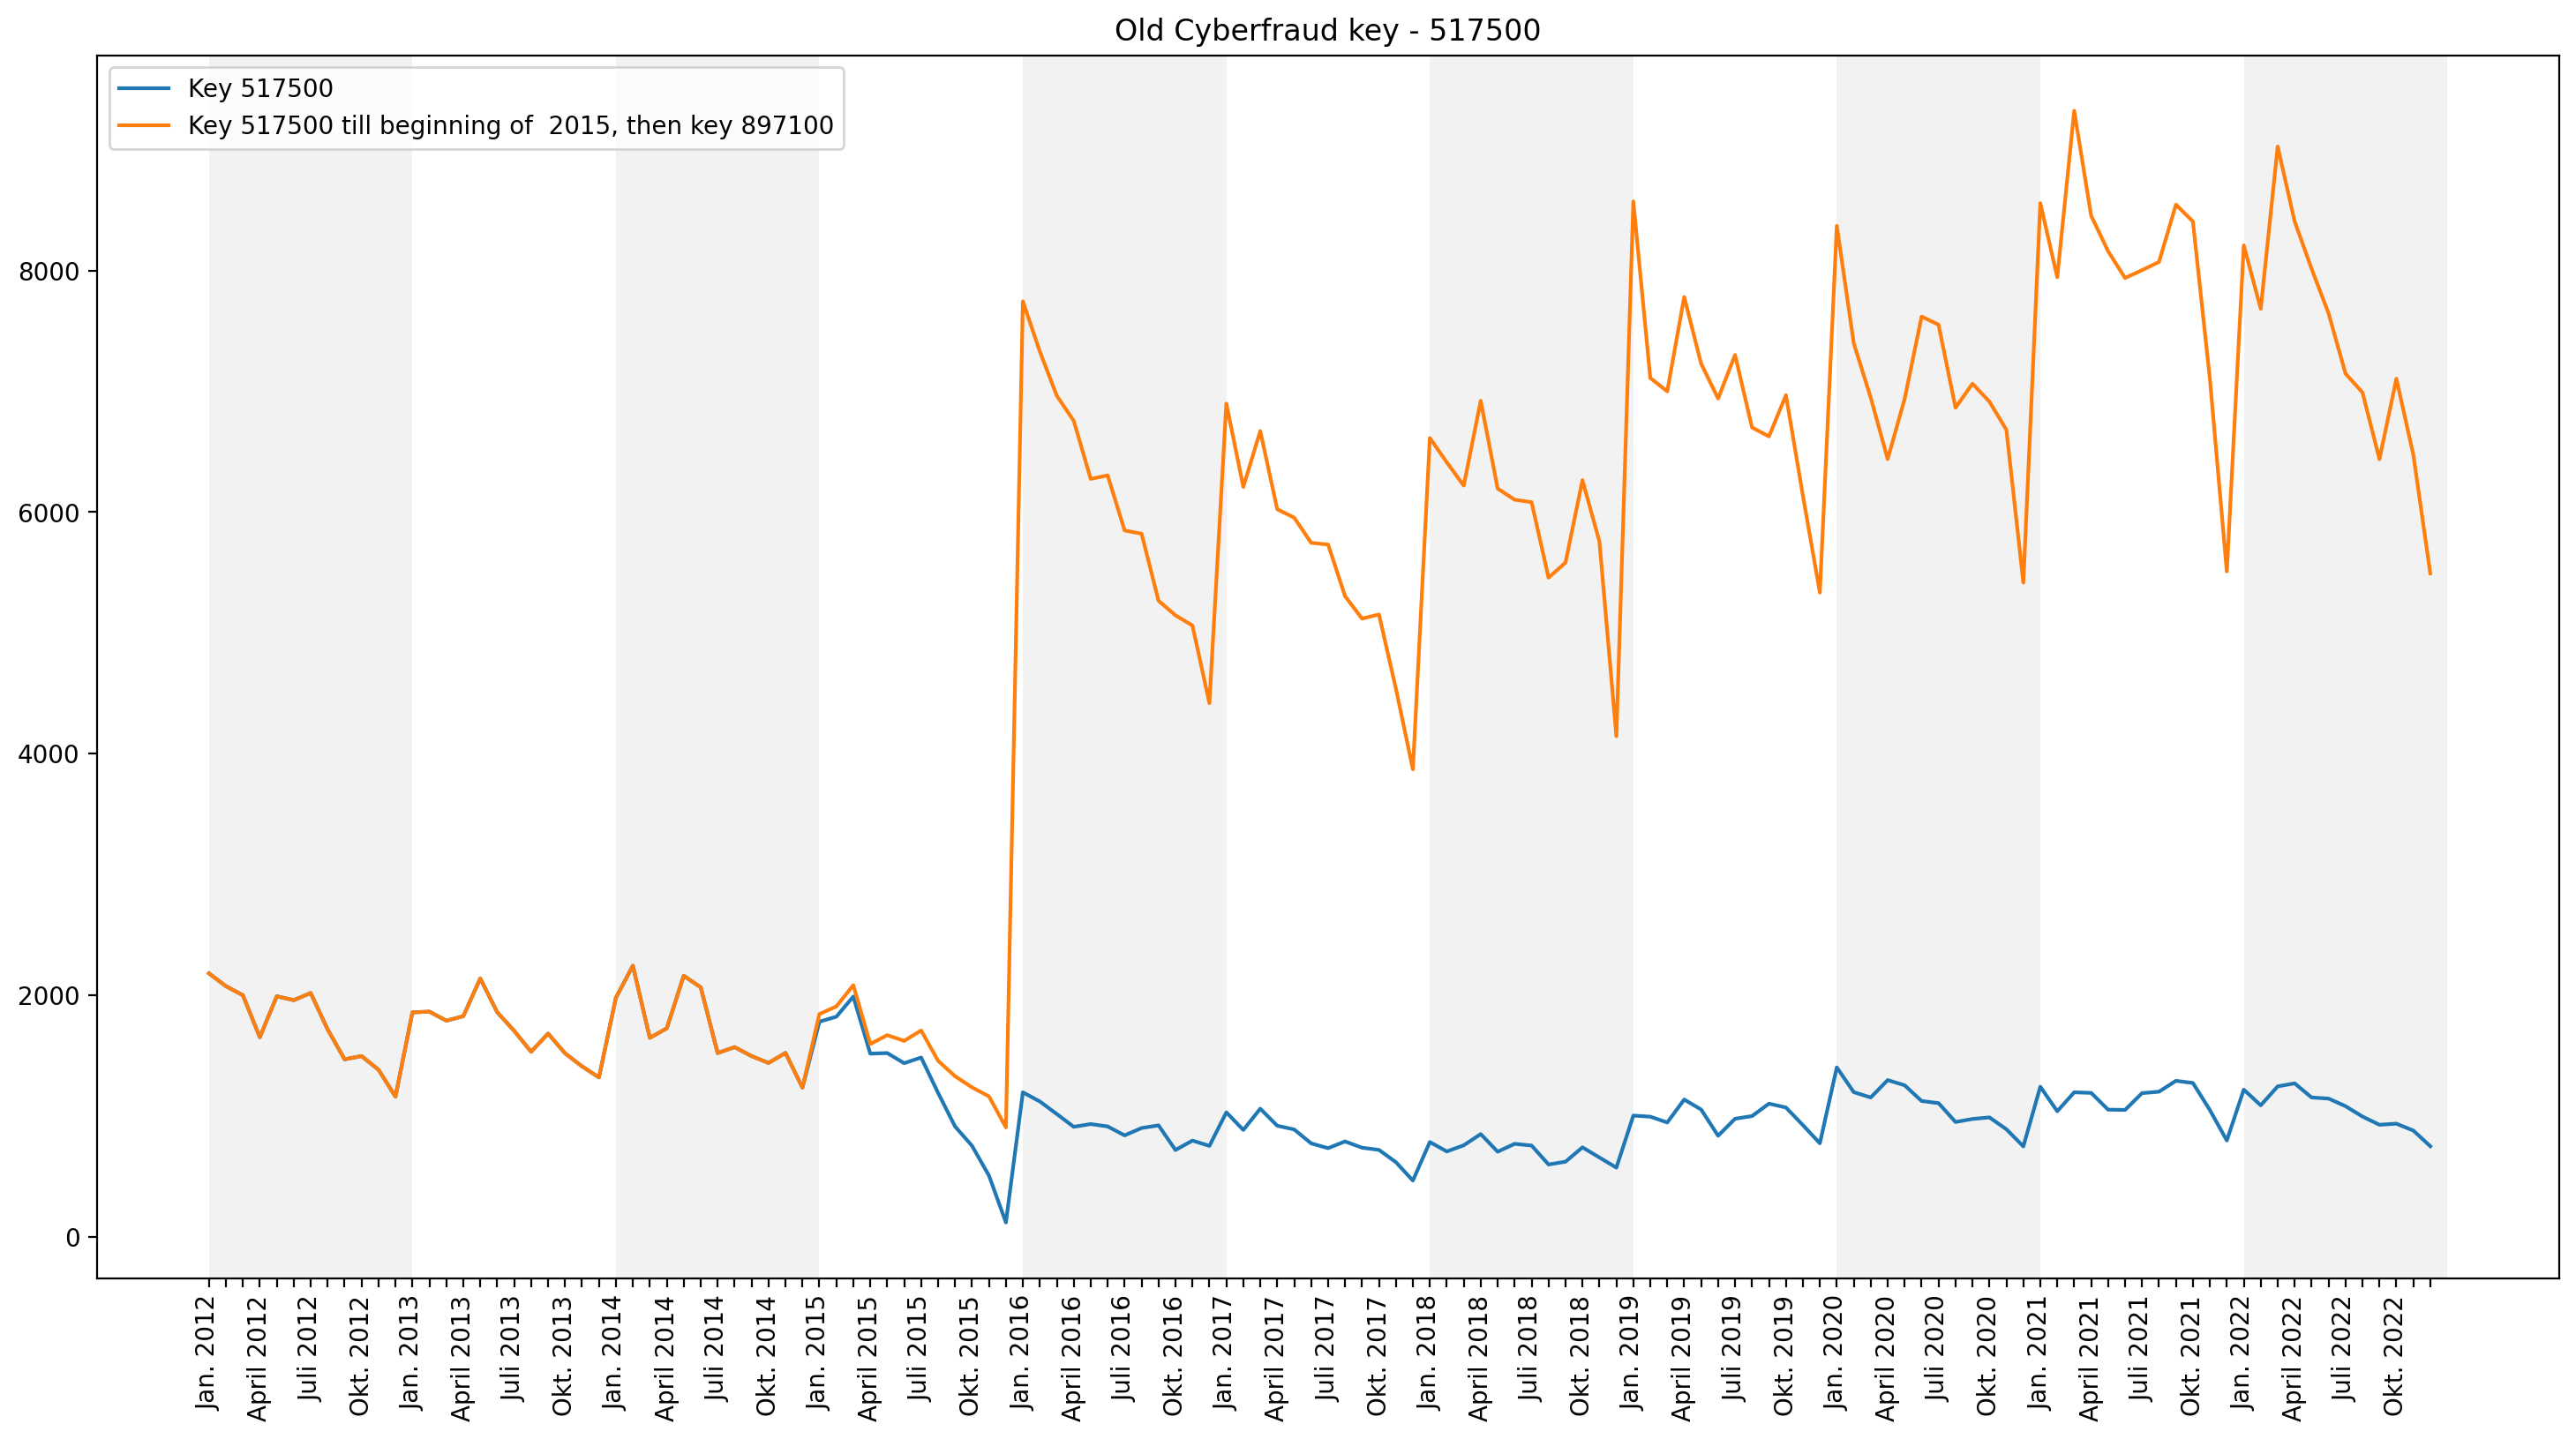

In [106]:
# Looking at Development of initial Computerbetrug Key 517500

data_517500 = get_cases_by_year('517500', df_years, False)
data_517500_flat = [element for year in data_517500 for element in year]


fig, axs = plt.subplots(figsize=(18,9))
axs.plot(x_labels_monthly, data_517500_flat)
axs.plot(flat_computerbetrug_cases)
axs.set_title('Old Cyberfraud key - 517500')
axs.tick_params(axis='x', rotation=90)
axs.legend(('Key 517500', 'Key 517500 till beginning of  2015, then key 897100'))
for ind, label in enumerate(axs.xaxis.get_ticklabels()):
    if ind % 3 != 0:
        label.set_visible(False)
   
for ind, month in enumerate(x_labels_monthly):
    if ind % 24 == 0:
        axs.axvspan(ind, ind+12, facecolor='grey', alpha=0.1)
        #axs.axvspan(ind+12, ind+12+12, facecolor='grey', alpha=0.2)

In [96]:
# Check if adding the same key up changes anything -> It doesn't
data_517500_add = get_cases_by_year('517500', df_years, True)
data_517500_flat_add = [element for year in data_517500 for element in year]

diff_data = False
for e1, e2 in zip(data_517500_flat, data_517500_flat_add):
    if e1 != e2:
        same_data = True

print('There are multiple occurances of the same key in one month: ' + str(diff_data))

There are multiple occurances of the same key in one month: False


### Looking at general develpment of crimes based on montly data

Vertical lines used to mark the end of a year &rarr; highlights cyclic pattern of crime development

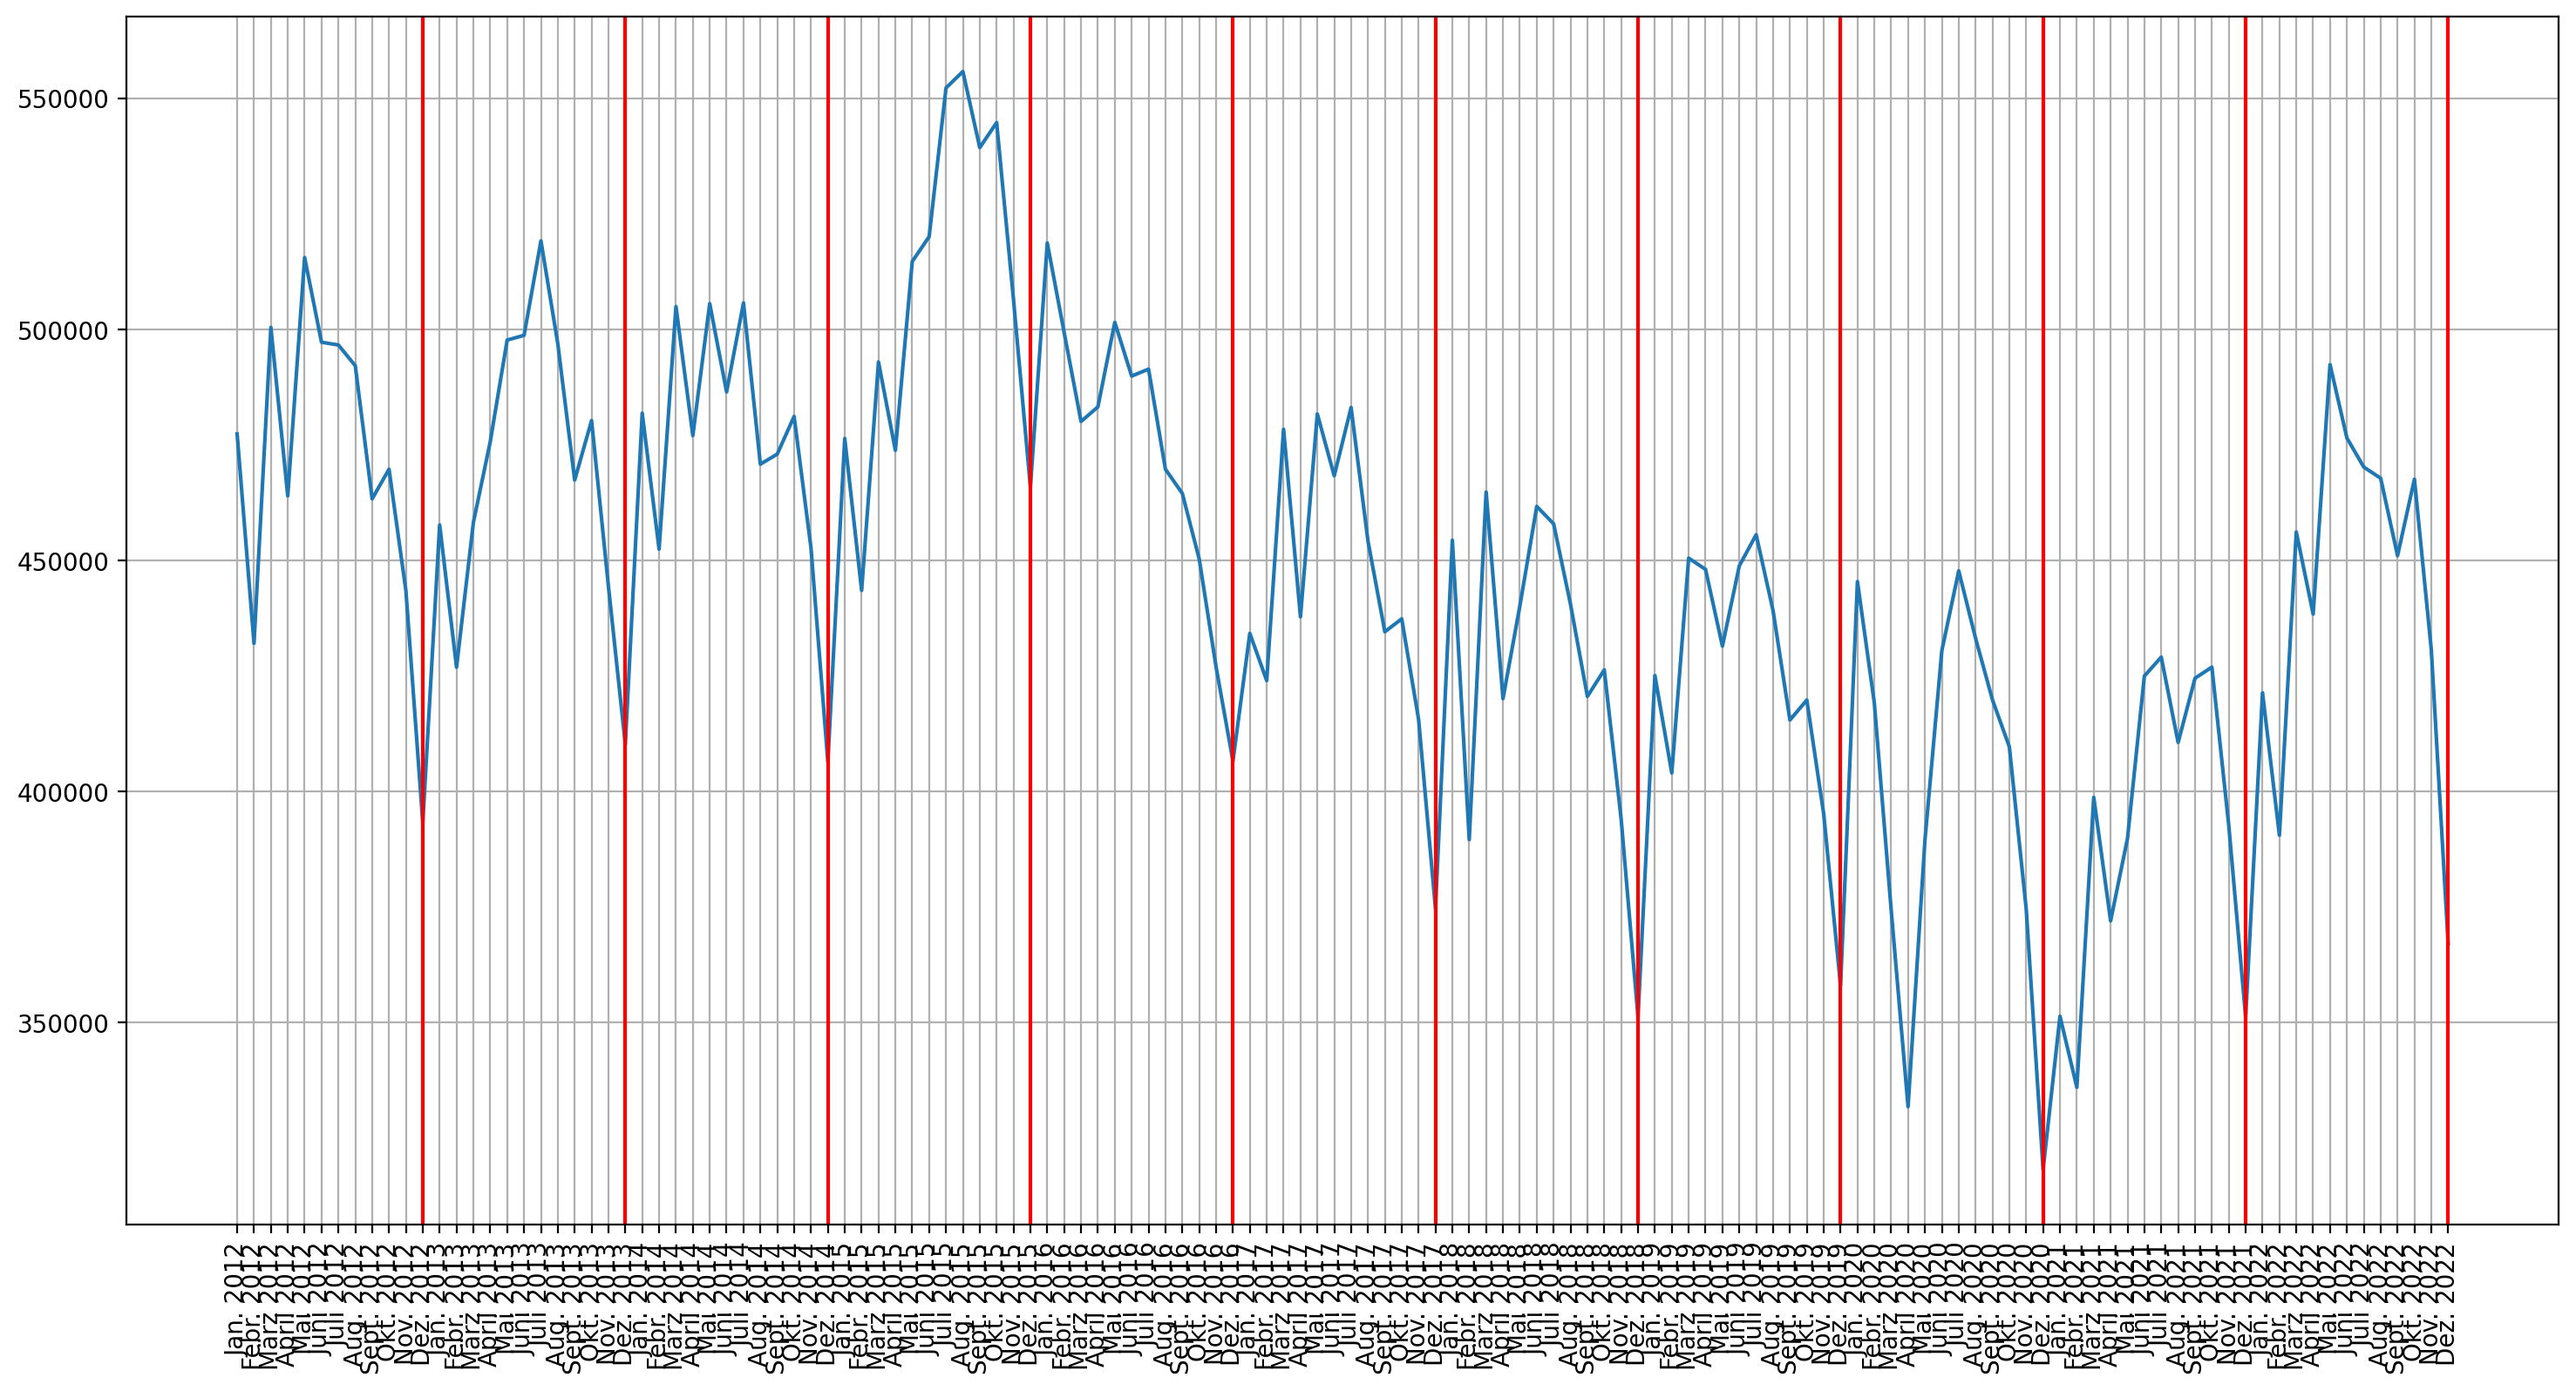

In [21]:
key = '------'

overall_crimes = get_cases_by_year(key, df_years, False)
flat_overall_crimes = [element for year in overall_crimes for element in year] 

fig, axs = plt.subplots(figsize=(18,9))
axs.plot(x_labels_monthly, flat_overall_crimes)
axs.tick_params(axis='x', rotation=90)
axs.grid(True)

for year in years:
    tick = 'Dez. ' + str(year)
    axs.axvline(x=tick , color='red')

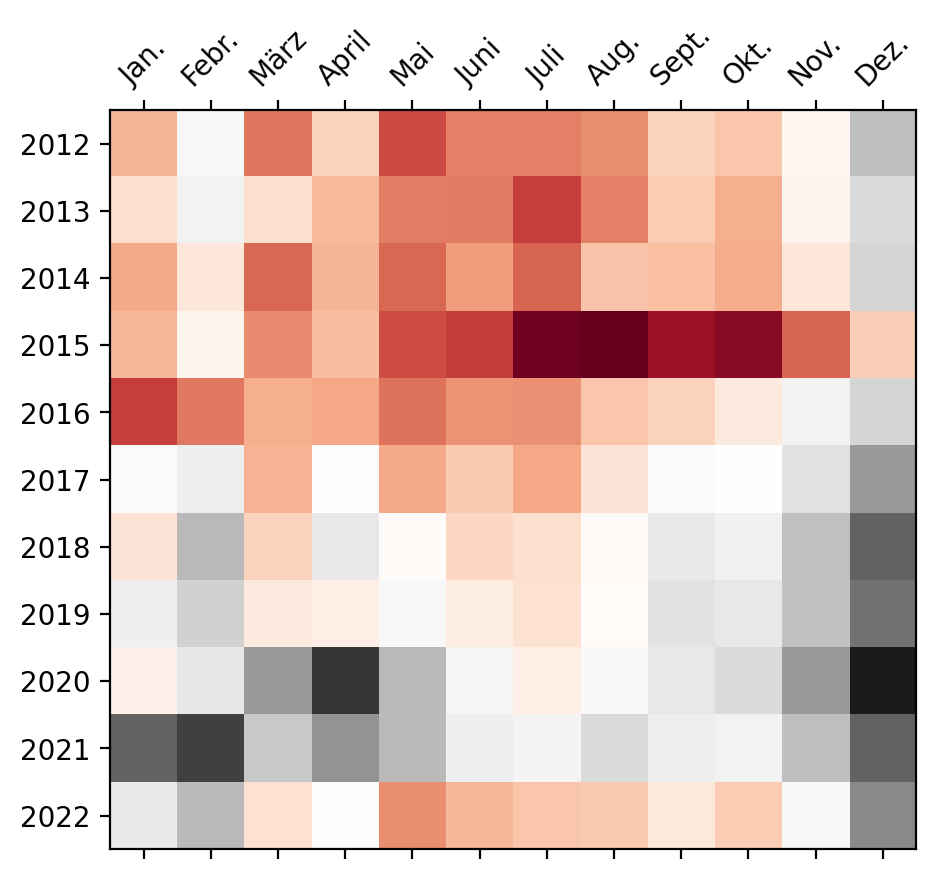

In [22]:
mat = np.ndarray((11,12)) # init matrix
months = ['Jan.', 'Febr.', 'März', 'April', 'Mai', 'Juni', 'Juli', 'Aug.', 'Sept.', 'Okt.', 'Nov.', 'Dez.']

for i,data in enumerate(flat_overall_crimes):
    mat[i//12,i%12] = data # fill matrix by division with remainder on index (12 months in a year)

# not the right way to do this, but it works as proof of concept
fig,ax = plt.subplots()
ax.matshow(mat,cmap='RdGy_r')
ax.set_yticks(range(0,11))
ax.set_xticks(range(0,12))
ax.set_xticklabels(months)
ax.set_yticklabels(range(2012,2023))
plt.xticks(rotation=45)
plt.show()

# KFZ Diebstahl 263a (<- Cybercrime) vs KFZ Diebstahl 263 (Herrkömmlich)

### Loading Monthly data

In [23]:
def get_yearly_cases_by_key(key, data, sum_same_key):
    cases_by_year = list()
    data_years = list()
    for (year, df) in data:           
        if sum_same_key:
            # summing up the entries in df that have an identical key
            cases_curr_year = 0
            for i in range(len(df['Anzahl erfasste Fälle'][df['Schlüssel'] == key])):
                cases_curr_year += df['Anzahl erfasste Fälle'][df['Schlüssel'] == key].iloc[i]
        else:
            # taking only the first entry that uses the key in df
            cases_curr_year = df['Anzahl erfasste Fälle'][df['Schlüssel'] == key].iloc[0]
            
        cases_by_year.append(cases_curr_year)
        data_years.append(year)

    return data_years, cases_by_year

In [24]:
"""
    Method that does the data analysis for 2 keys. It does plots of crime development yearly and monthly and also calculates the correlation, ...
    It just works for crimes that have had the same key during that time.
    It is advisable to set the c1_key to the more frequent crime for the direct comparison plot.
"""
def create_data_montly_over_years(years:range, data:dict, c1_key:str, c2_key:str, sum_key_of_c1_and_c2:str = None, c1_key_name:str = None, c2_key_name:str = None, sum_key_name:str = None):
    # Get all the monthly data
    df_years_monthly = list()
    df_yearly = list()
    for year in years:
        data_in_year = data[year]['BU-F-08']
        df_years_monthly.append(data_in_year)
        df_yearly.append((year, data[year]))
        # Get crime names based on the crime names of the newest yearly report
            
    return [df_years_monthly, df_yearly, c1_key_name, c2_key_name, sum_key_name]

def create_plots(c1_key, c2_key, sum_key_of_c1_and_c2, y_ticks, y_ticks_combined, args):
    df_years_monthly, df_yearly, c1_key_name, c2_key_name, sum_key_name = args

    # Get the cases from the keys
    c1_cases_monthly = get_cases_by_year(c1_key, df_years_monthly, True)
    flat_c1_cases_monthly = [element for year in c1_cases_monthly for element in year]
    c2_cases_monthly = get_cases_by_year(c2_key, df_years_monthly, True)
    flat_c2_cases_monthly = [element for year in c2_cases_monthly for element in year]
    if sum_key_of_c1_and_c2 is not None:
        sum_cases_monthly = get_cases_by_year(sum_key_of_c1_and_c2, df_years_monthly, True)
        flat_sum_cases_monthly  = [element for year in sum_cases_monthly for element in year]
    x_labels_monthly = create_x_labels(years)

    c1_years, c1_cases_yearly = get_yearly_cases_by_key(c1_key, df_yearly, True)
    c2_years, c2_cases_yearly = get_yearly_cases_by_key(c2_key, df_yearly, True)
    if sum_key_of_c1_and_c2 is not None:
        sum_years, sum_cases_yearly = get_yearly_cases_by_key(sum_key_of_c1_and_c2, df_yearly, True)
    
    # Direct comparison with yearly data
    fig, axs = plt.subplots(1, 3, figsize=(15, 6))
    axs[0].plot(c1_years, c1_cases_yearly)
    axs[0].set_title(c1_key_name)
    axs[1].plot(c2_years, c2_cases_yearly, color='red')
    axs[1].set_title(c2_key_name)
    axs[2].plot(c1_years, c1_cases_yearly)
    axs[2].plot(c2_years, c2_cases_yearly, color='red')
    axs[2].set_title("Direct comparison")
    axs[2].legend([c1_key_name, c2_key_name])
    plt.show()
    plt.close()
   

    

    # plot monthly crimes over the years
    fig, axs = plt.subplots(2, 1, figsize=(15, 18))
    axs[0].plot(x_labels_monthly, flat_c1_cases_monthly)
    axs[0].set_title(f'{c1_key_name} from {years[0]} to {years[-1]}')
    axs[0].tick_params(axis='x', rotation=90)
    axs[0].grid(True)

    axs[1].plot(x_labels_monthly, flat_c2_cases_monthly)
    axs[1].set_title(f'{c2_key_name} from {years[0]} to {years[-1]}')
    axs[1].tick_params(axis='x', rotation=90)
    axs[1].grid(True)

    for year in years:
        tick = 'Dez. ' + str(year)
        axs[0].axvline(x=tick, color='red')
        axs[1].axvline(x=tick, color='red')

    n = 3  # Keeps every 7th label
    [l.set_visible(False) for (i,l) in enumerate(axs[0].xaxis.get_ticklabels()) if i % n != 0]
    [l.set_visible(False) for (i,l) in enumerate(axs[1].xaxis.get_ticklabels()) if i % n != 0]

    plt.show()

    
    # Compare them directly in one plot
    fig, axs = plt.subplots(sharey=True, layout='constrained', figsize=(15,9))
    axs.fill_between(x_labels_monthly, flat_c1_cases_monthly)
    axs.fill_between(x_labels_monthly, flat_c2_cases_monthly)
    axs.set(yscale='linear', title=f'{c1_key_name} vs. {c1_key_name}')
    axs.legend([c1_key_name, c2_key_name])
    axs.tick_params(axis='x', rotation=90)
    axs.grid(True)
    monthly_max = max(np.max(flat_c2_cases_monthly), np.max(flat_c1_cases_monthly))
    monthly_y_ticks = np.arange(0, np.ceil(monthly_max/1000)*1000, y_ticks)
    axs.set_yticks(monthly_y_ticks)
    [l.set_visible(False) for (i,l) in enumerate(axs.xaxis.get_ticklabels()) if i % n != 0] # Keep every n-th label
    
    for year in years:
        tick = 'Dez. ' + str(year)
        axs.axvline(x=tick, color='red')

    plt.show()

    # Plot the sum of them (with given sum key if given)
    # Find the maximum length of the two lists
    max_length = max(len(flat_c1_cases_monthly), len(flat_c2_cases_monthly))
    # Pad the shorter list with zeros to make them equal in length
    flat_c1_cases_padded = np.pad(flat_c1_cases_monthly, (0, max_length - len(flat_c1_cases_monthly)))
    flat_c2_cases_padded = np.pad(flat_c2_cases_monthly, (0, max_length - len(flat_c2_cases_monthly)))

    fig, axs = plt.subplots(sharey=True, layout='constrained', figsize=(15,9))
    axs.fill_between(x_labels_monthly, flat_c1_cases_padded, alpha=0.5)
    axs.fill_between(x_labels_monthly, flat_c2_cases_padded+flat_c1_cases_padded, flat_c1_cases_padded, alpha=0.5)
    if sum_key_of_c1_and_c2 is not None:
        axs.plot(x_labels_monthly, flat_sum_cases_monthly, c='black')
        axs.legend([sum_key_name, c1_key_name, c2_key_name])
        axs.set(yscale='linear', title=f'{sum_key_name} of {c1_key_name} + {c1_key_name}')
    else:
        axs.legend([c1_key_name, c2_key_name])
        axs.set(yscale='linear', title=f'{c1_key_name} + {c1_key_name}')
    
    axs.tick_params(axis='x', rotation=90)
    axs.grid(True)
    monthly_max_combined = np.max(flat_c2_cases_padded+flat_c1_cases_padded)
    monthly_y_ticks_combined = np.arange(0, np.ceil(monthly_max_combined/1000)*1000, y_ticks_combined)
    axs.set_yticks(monthly_y_ticks_combined)
    [l.set_visible(False) for (i,l) in enumerate(axs.xaxis.get_ticklabels()) if i % n != 0] # keep every n-th label

    for year in years:
        tick = 'Dez. ' + str(year)
        axs.axvline(x=tick, color='red')

    plt.show()

    # Compute Correlation coefficient for all cases in a year
    print(f"Pearson product-moment correlation coefficients of {c1_key_name} and {c2_key_name} with yearly data: \n{np.corrcoef(c1_cases_yearly, c2_cases_yearly)}") 
    print(f"Pearson product-moment correlation coefficients of {c1_key_name} and {c2_key_name} with monthly data: \n{np.corrcoef(flat_c1_cases_monthly, flat_c2_cases_monthly)}")

In [25]:
c1_key = '897000'
c2_key = '632079'
sum_key_of_c1_and_c2 = None
processed_data_for_keys = create_data_montly_over_years(years, db_monthly_and_yearly_data, c1_key, c2_key, sum_key_of_c1_and_c2)


NameError: name 'db_monthly_and_yearly_data' is not defined

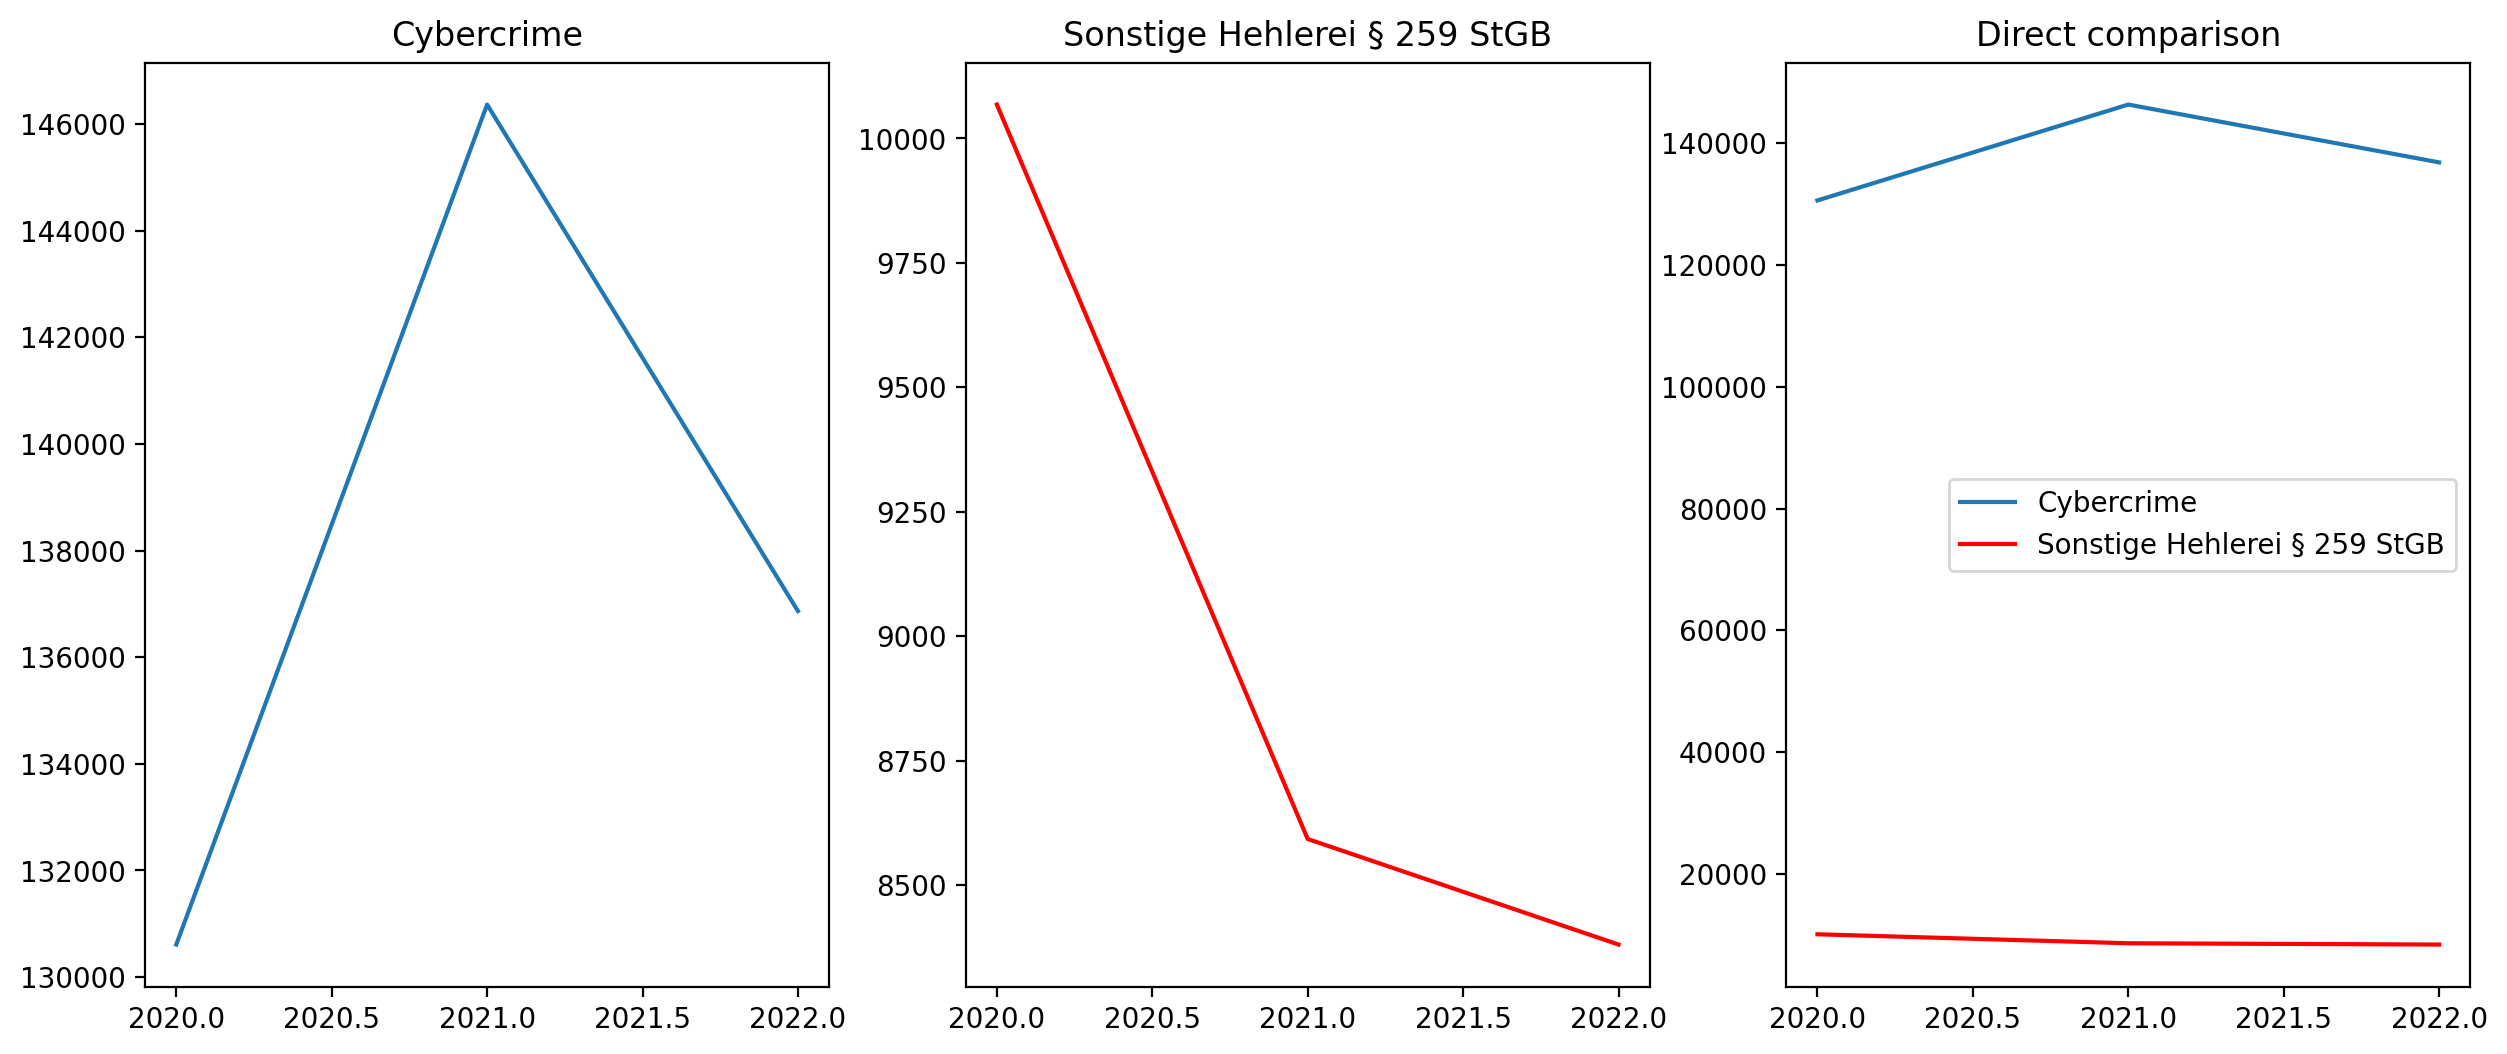

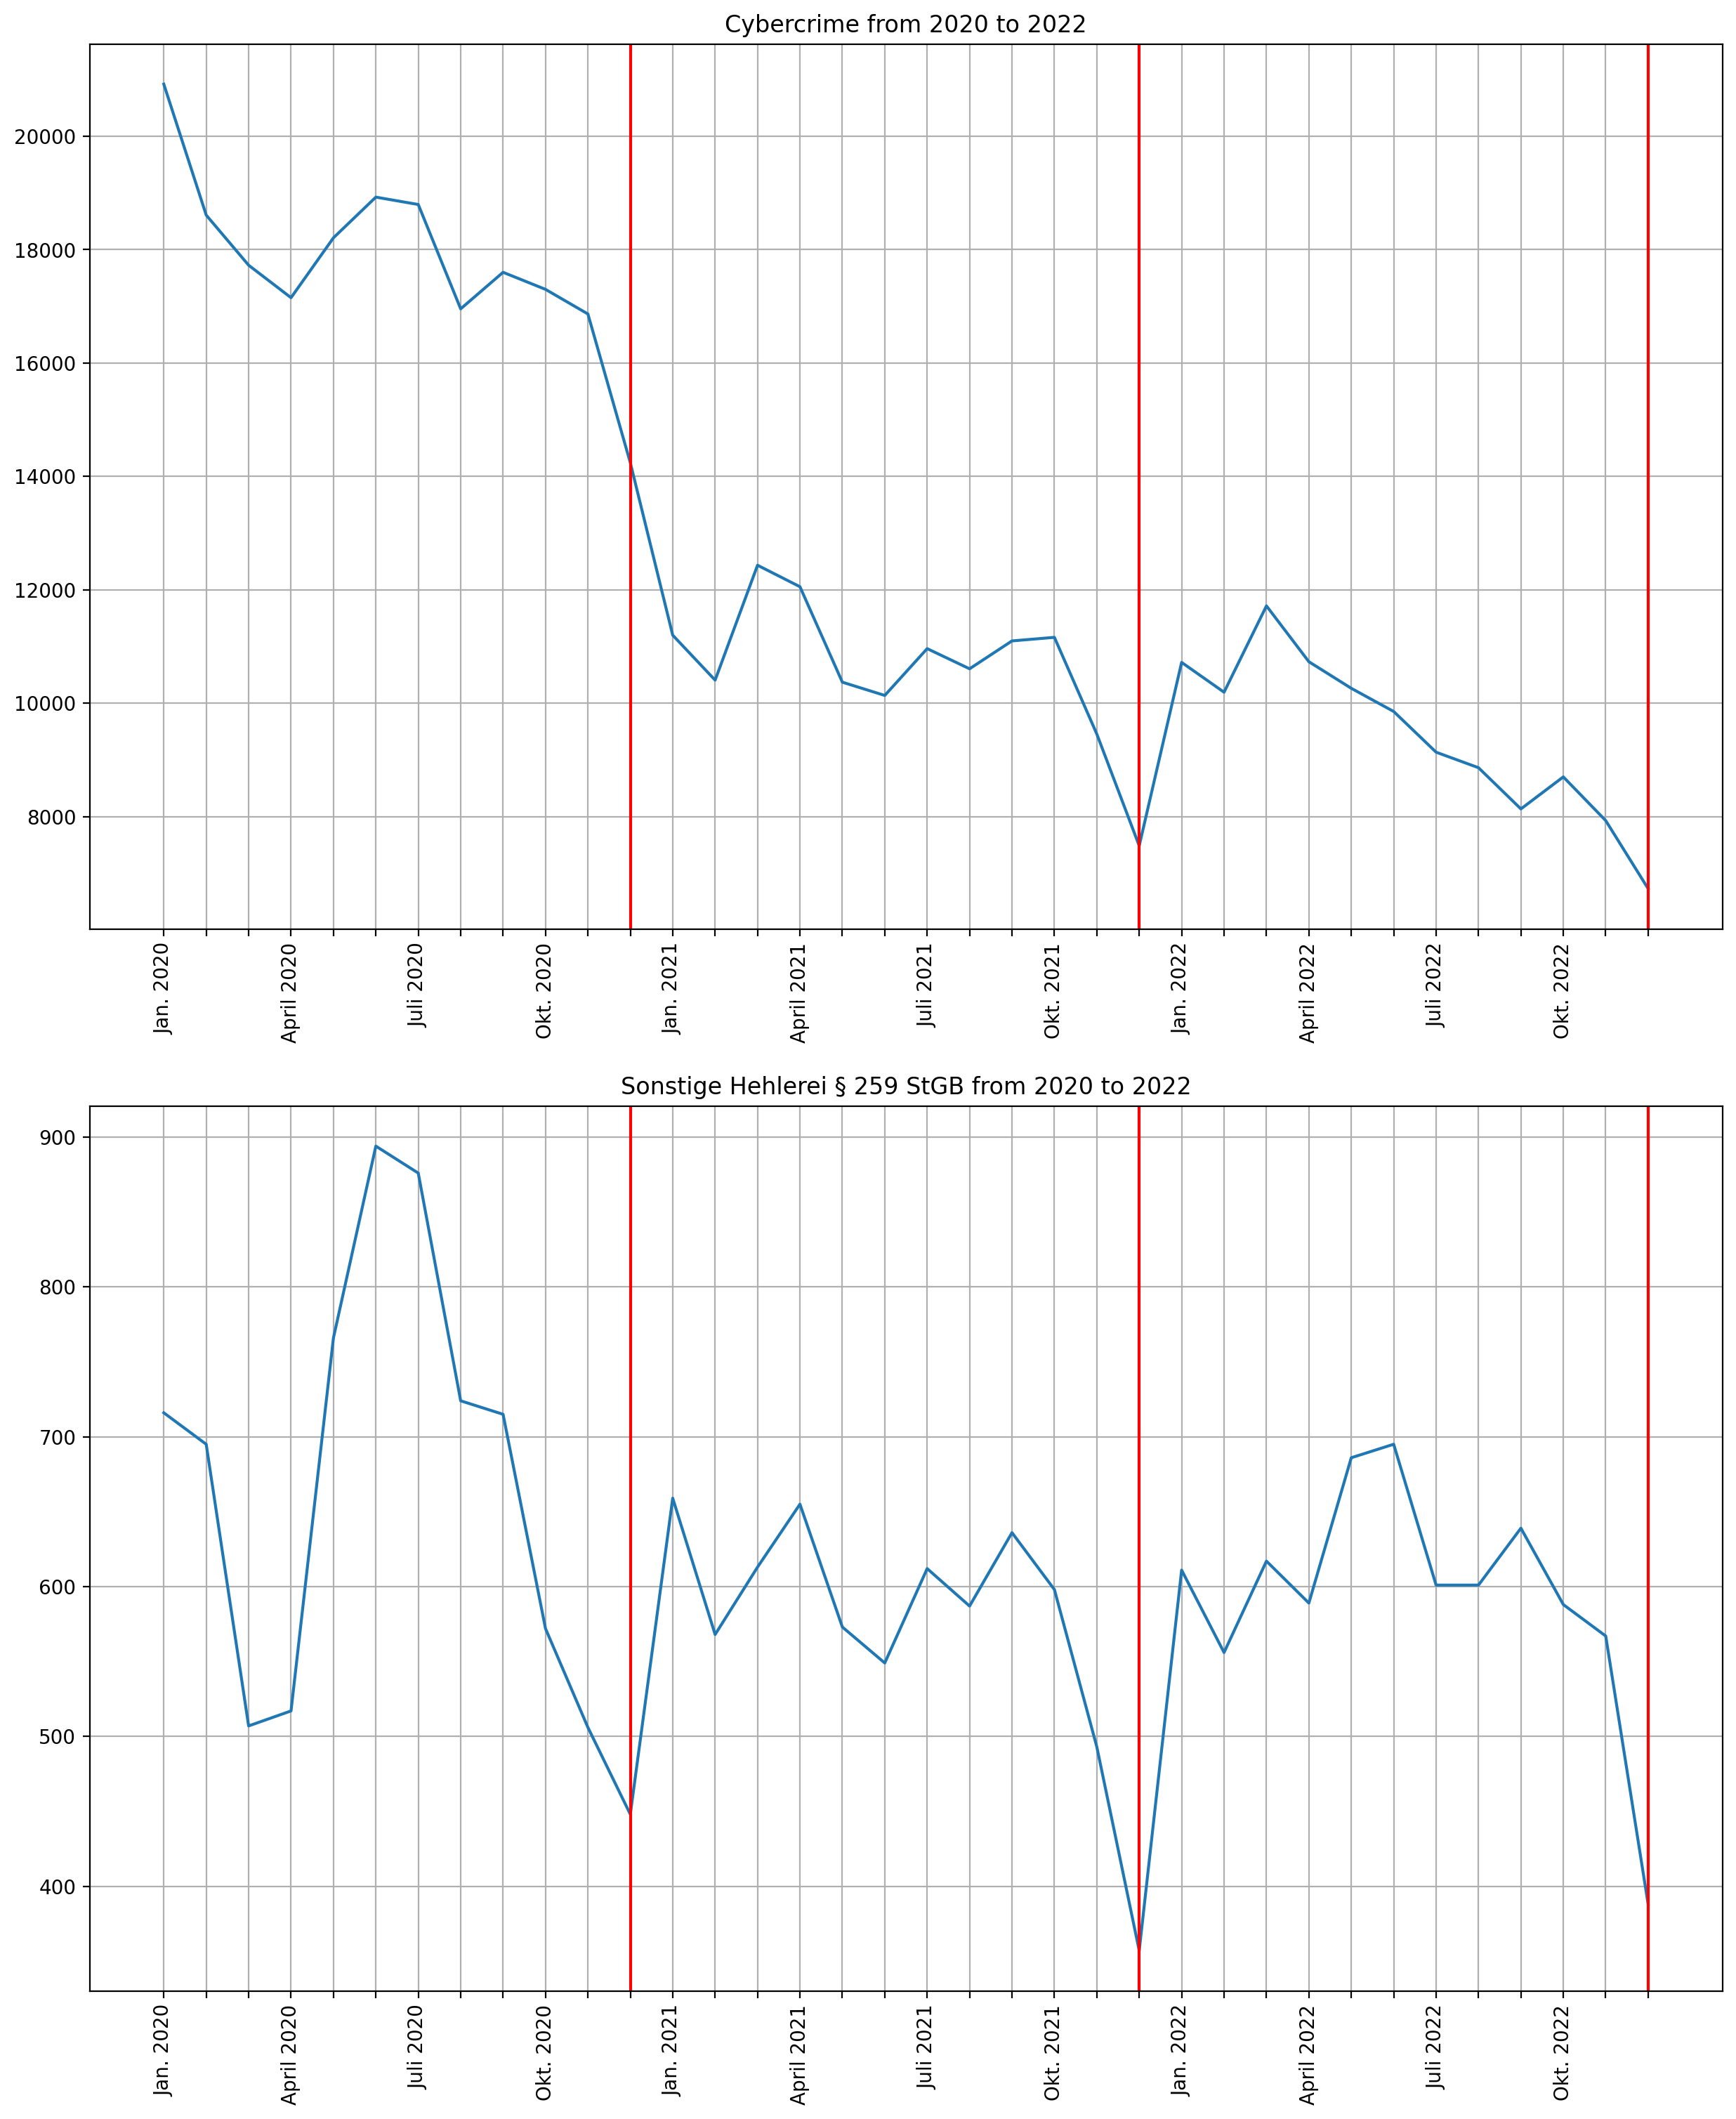

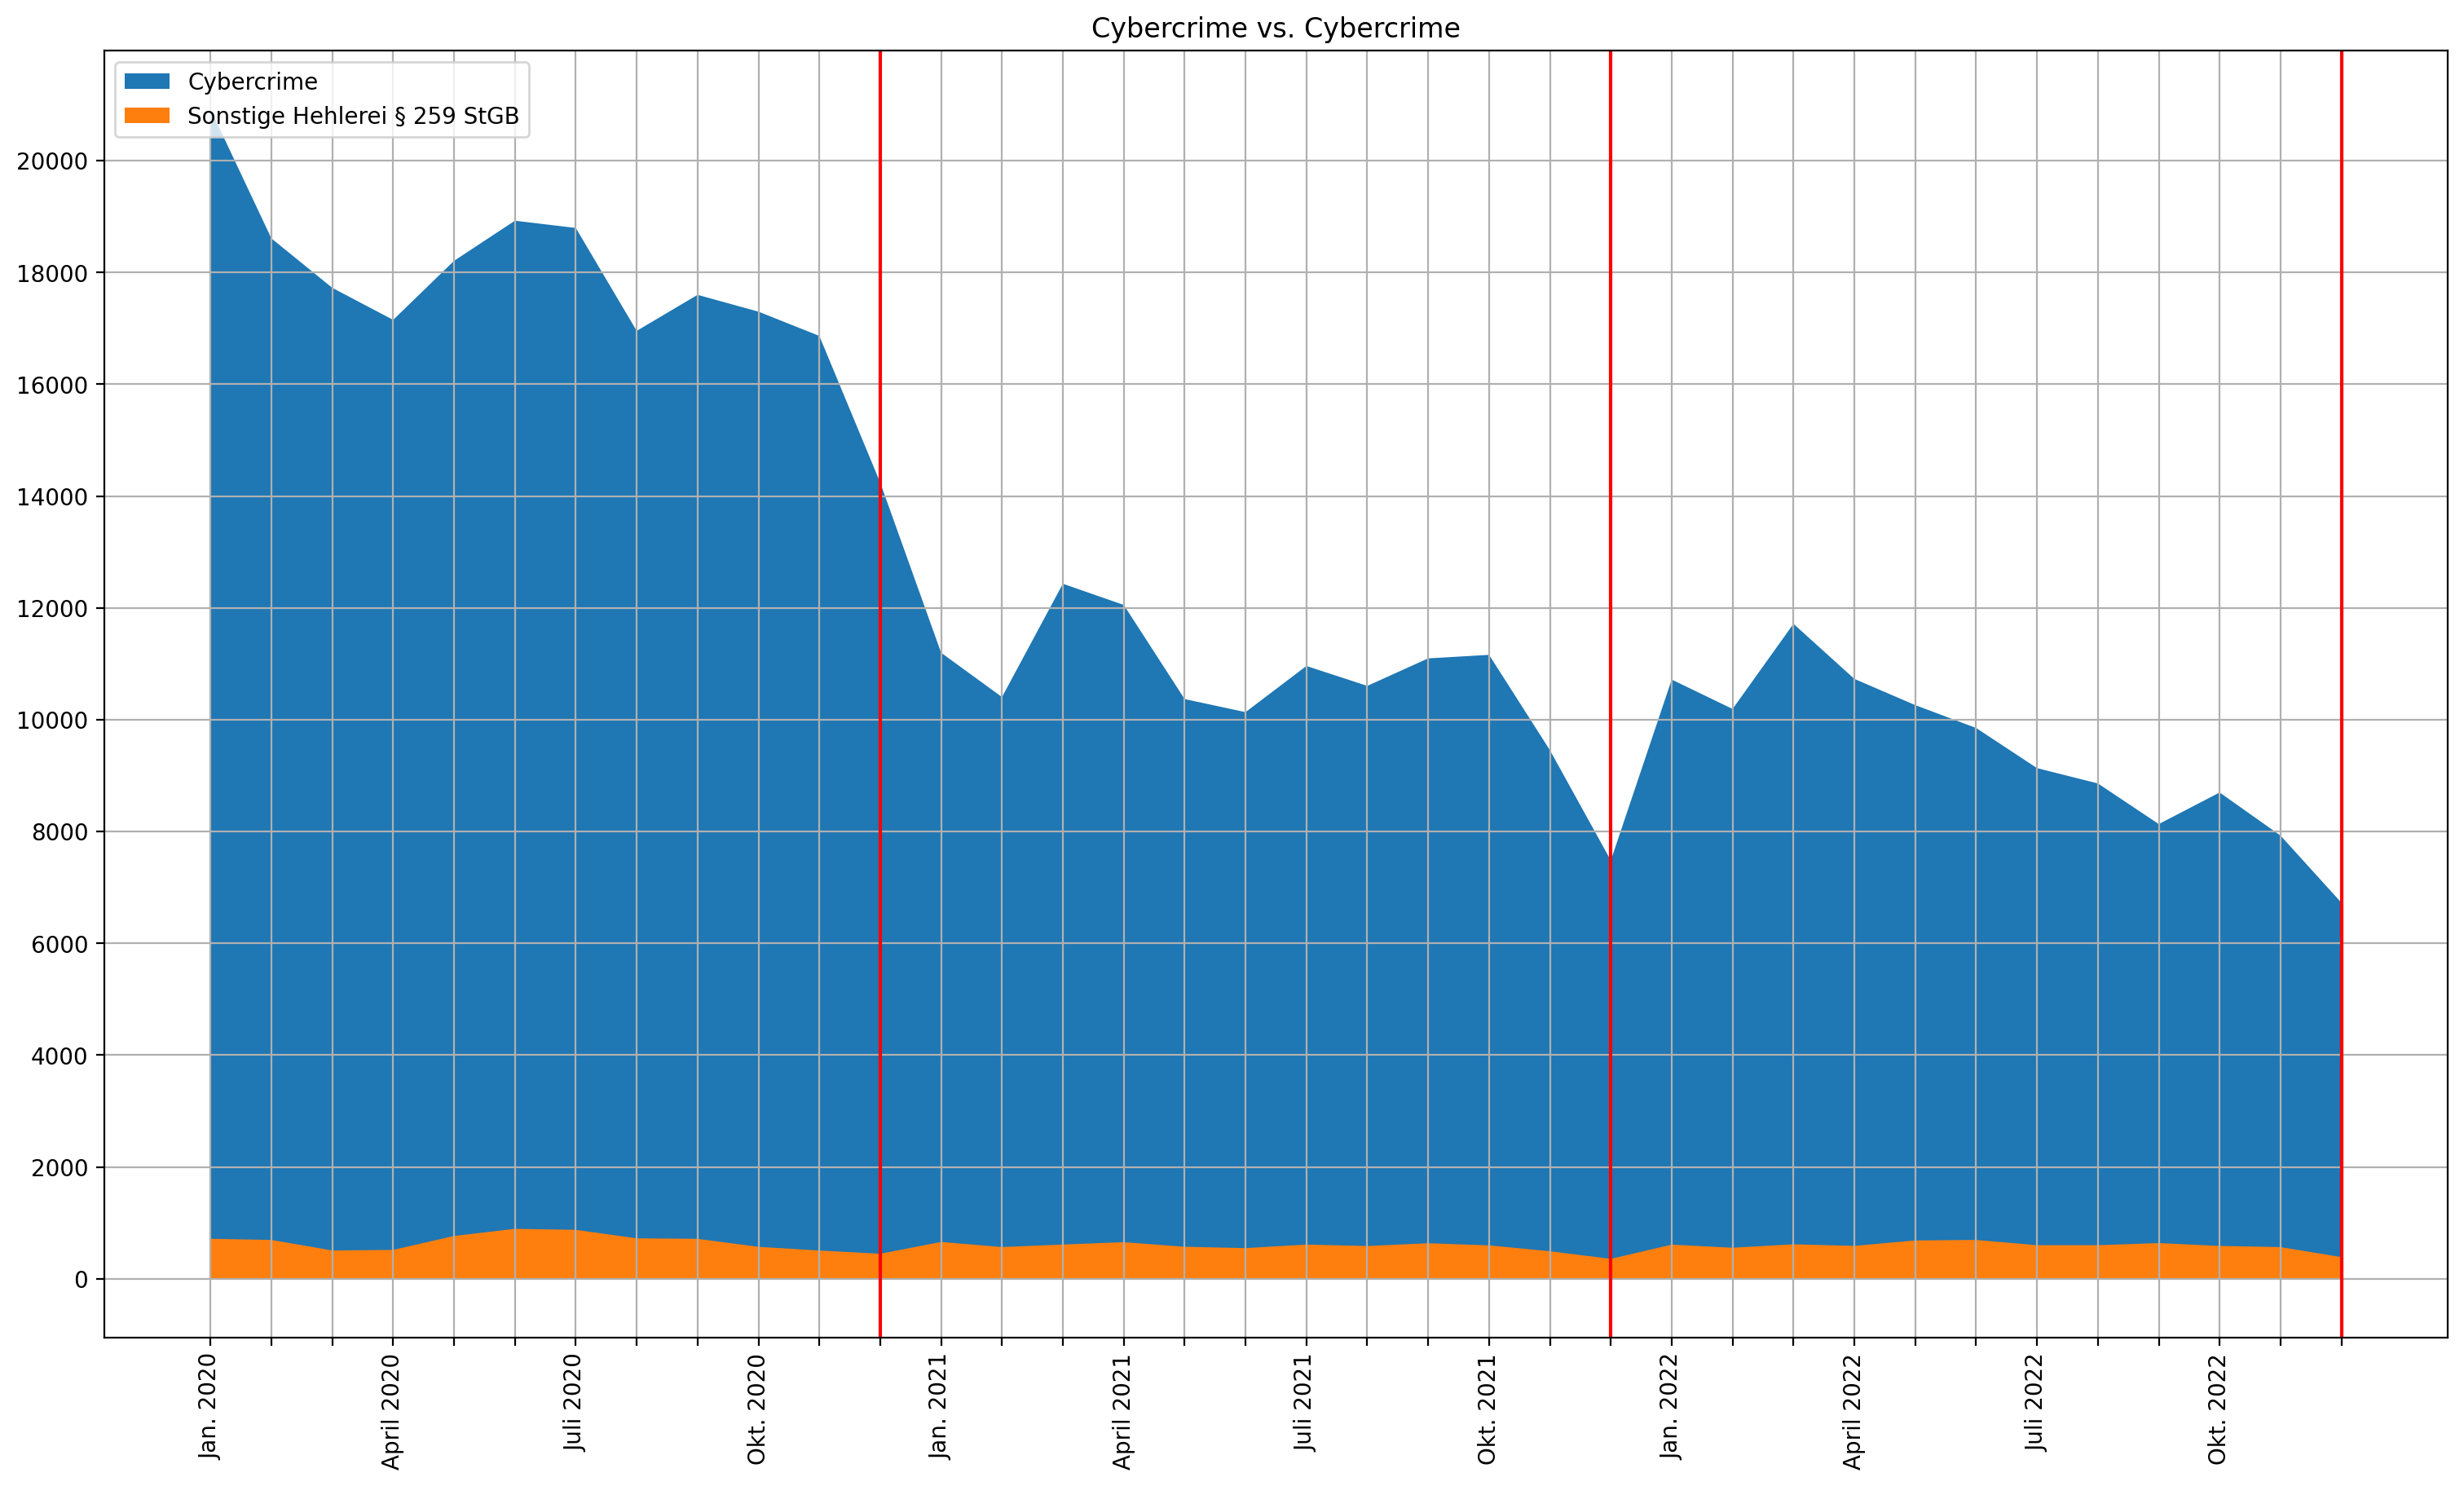

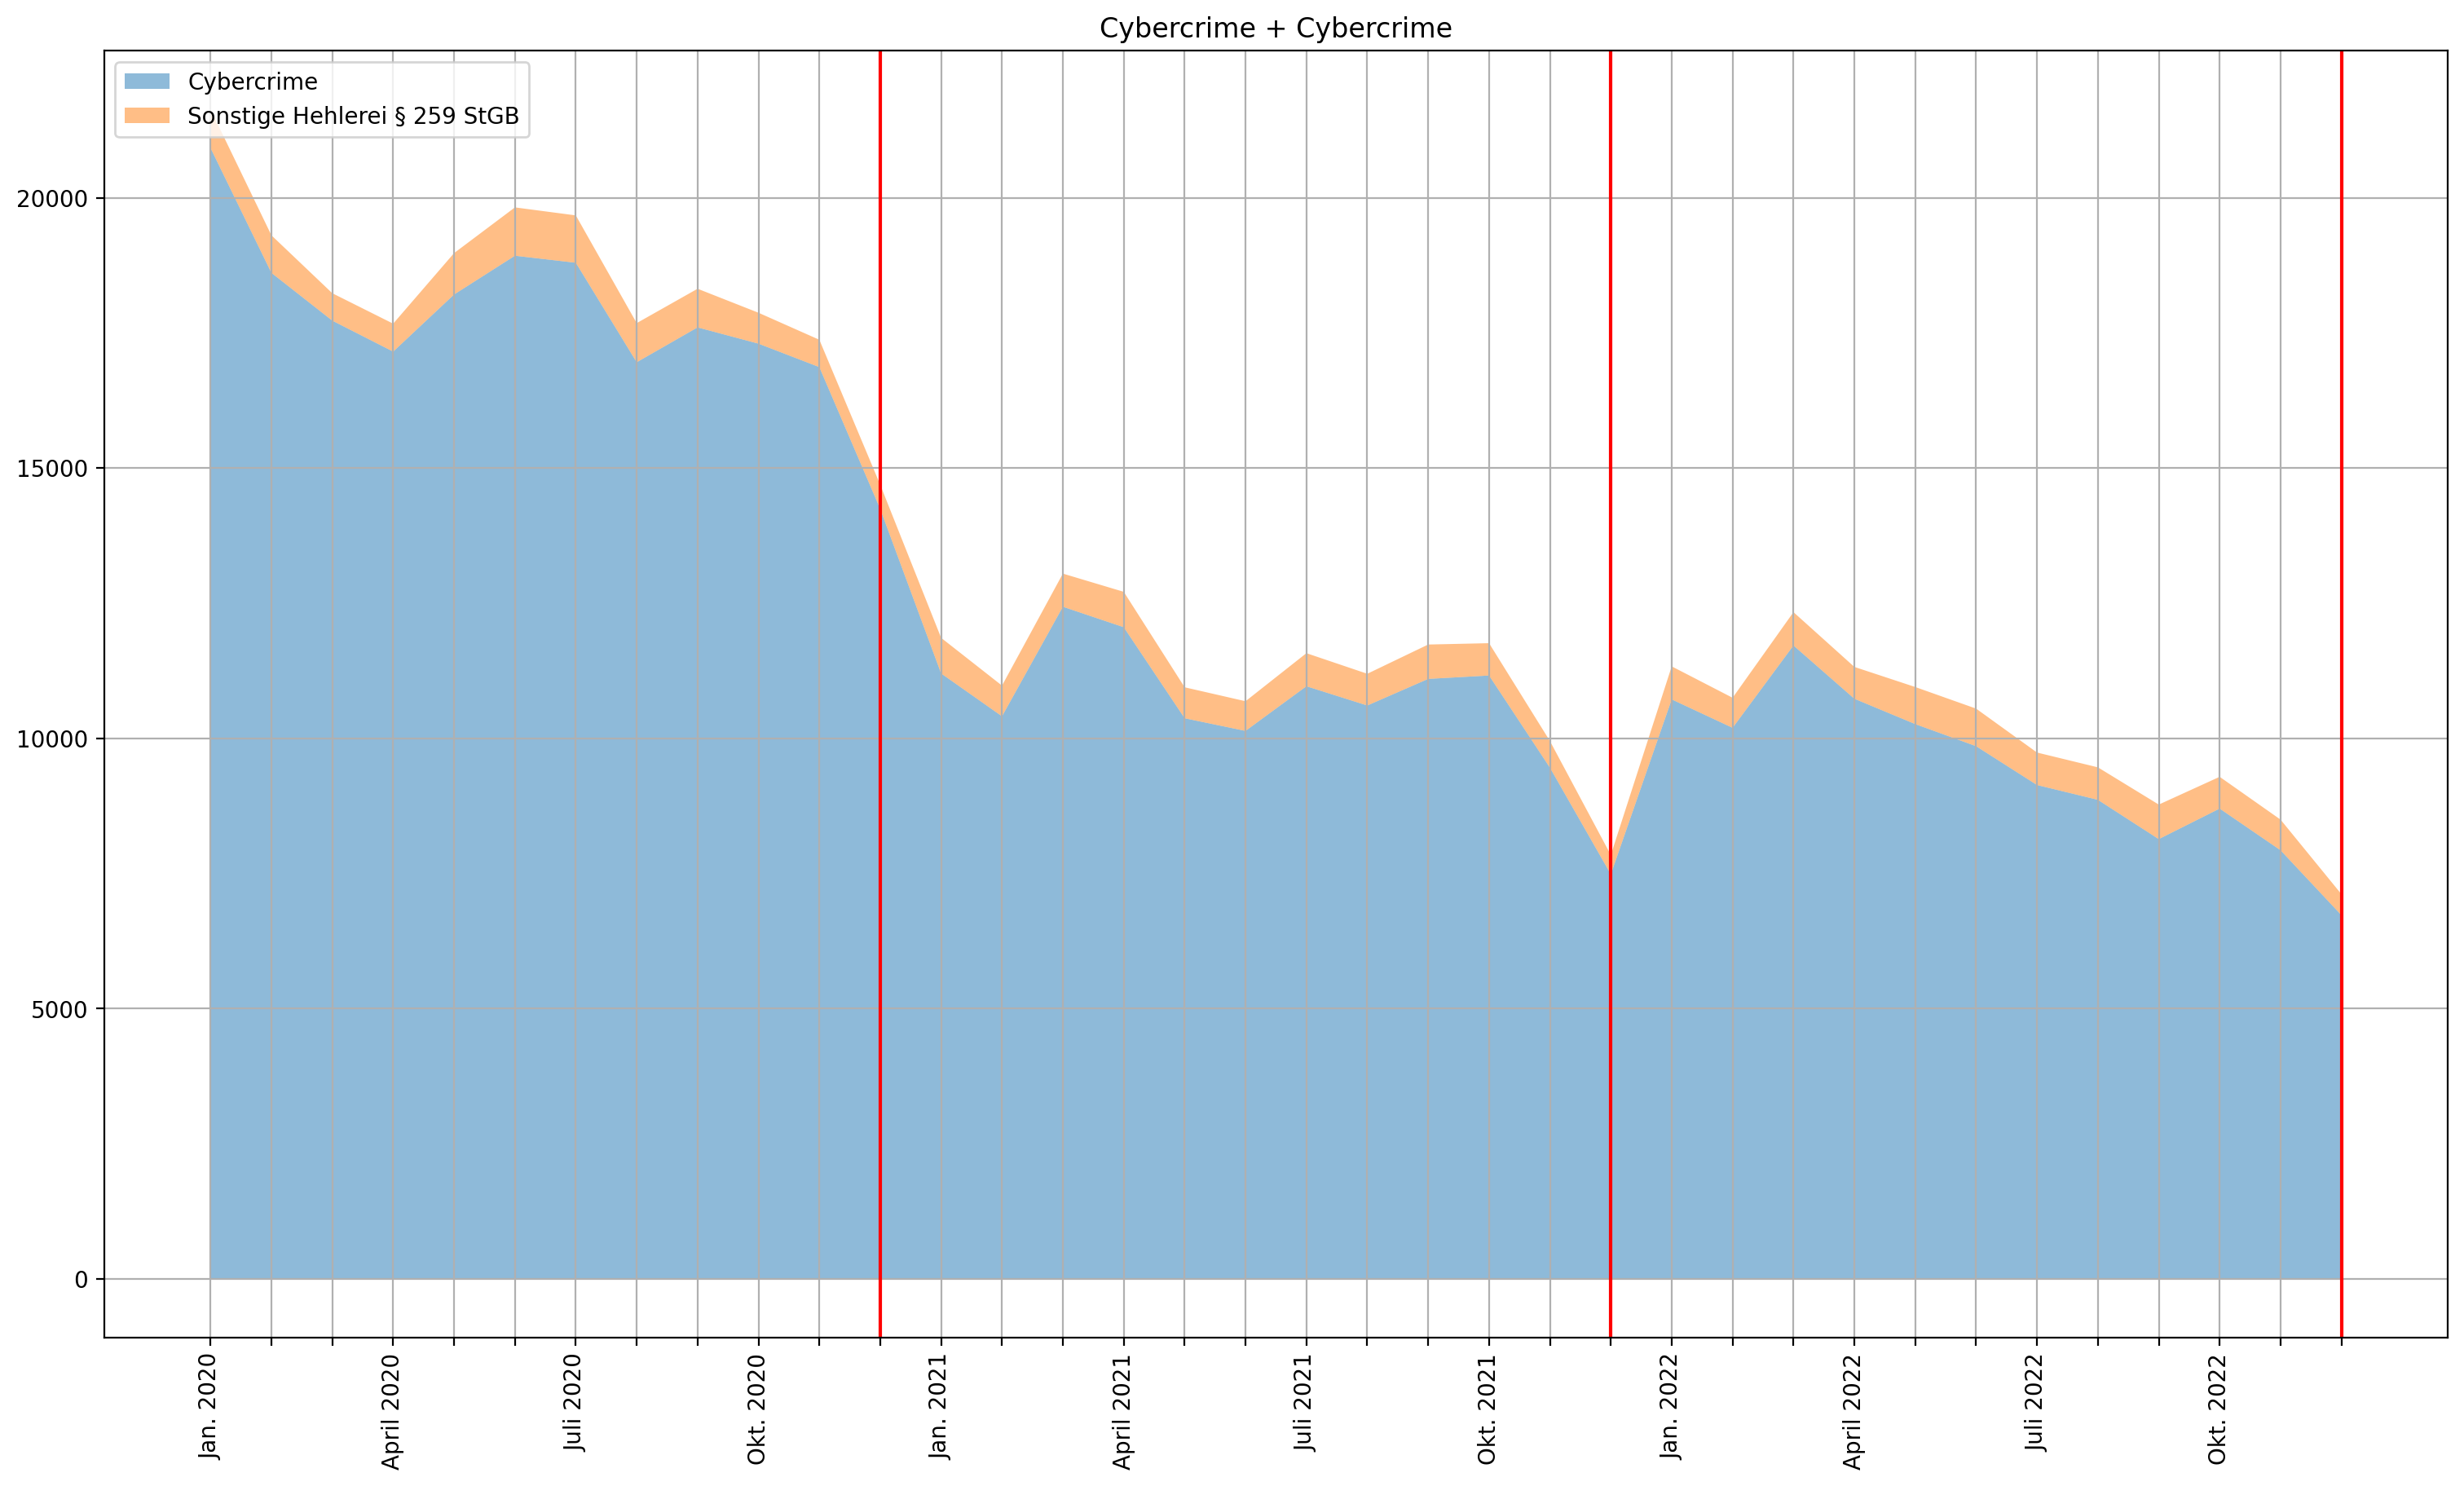

Pearson product-moment correlation coefficients of Cybercrime and Sonstige Hehlerei § 259 StGB with yearly data: 
[[ 1.         -0.72651933]
 [-0.72651933  1.        ]]
Pearson product-moment correlation coefficients of Cybercrime and Sonstige Hehlerei § 259 StGB with monthly data: 
[[1.         0.51853698]
 [0.51853698 1.        ]]


In [ ]:
create_plots(c1_key, c2_key, sum_key_of_c1_and_c2, y_ticks=2000, y_ticks_combined=5000, args=processed_data_for_keys)